In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [2]:
### set file directories
fdiry = file.path(FD_RES, "results", "comparison")
fname = "result.ranknorm.starrmpra.tsv"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath)

### assign and show
dat_peak_starrmpra_res = dat
print(dim(dat))
head(dat)

Rows: 5166 Columns: 10
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): Chrom, Peak, TMPRA_Gene, TMPRA_Dataset, CRISPR_HCFF, Assay
dbl (4): Start, End, Log2FC, RankNorm_Total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 5166   10


Chrom,Start,End,Peak,TMPRA_Gene,TMPRA_Dataset,CRISPR_HCFF,Assay,Log2FC,RankNorm_Total
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chr11,4539569,4540043,chr11_4539569_4540043,HBE1,OL45,"HBE1,HBG1,HBG2,HBS1L,MYB",ASTARR,0.14501695,0.6550523
chr11,4551336,4552012,chr11_4551336_4552012,HBE1,OL45,NA,ASTARR,0.32125162,0.7560976
chr11,4553969,4555012,chr11_4553969_4555012,HBE1,OL45,NA,ASTARR,0.14529397,0.6556330
chr11,4569016,4569992,chr11_4569016_4569992,HBE1,OL45,NA,ASTARR,0.01136464,0.5673635
chr11,4577444,4578031,chr11_4577444_4578031,HBE1,OL45,NA,ASTARR,0.24524353,0.7154472
chr11,4601808,4602487,chr11_4601808_4602487,HBE1,OL45,NA,ASTARR,-0.57215284,0.1277584


In [3]:
### set file directories
fdiry = file.path(FD_RES, "results", "comparison")
fname = "result.ranknorm.starrmpra.crispr.tsv"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath)

### assign and show
dat_peak_score_starrmpra_crispr = dat
print(dim(dat))
head(dat)

Rows: 1722 Columns: 4
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Peak
dbl (3): RankNorm, CRISPR_pos, CRISPR_neg

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 1722    4


Peak,RankNorm,CRISPR_pos,CRISPR_neg
<chr>,<dbl>,<dbl>,<dbl>
chrX_48996933_48997220,0.002129307,0.00000000,0.0000000
chr8_128298518_128298762,0.009291521,0.29710614,0.0000000
chr8_128242220_128242507,0.039876113,0.01841620,-0.3771868
chr11_34024311_34024546,0.040456833,0.00000000,0.0000000
chr8_128189792_128190210,0.041231127,0.09226309,-0.1074660
chr20_56703281_56703575,0.048199768,0.00000000,0.0000000


## Set factor for plotting order of OCRs

In [4]:
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% arrange(RankNorm)

PEAKS  = dat$Peak
ASSAYS = c("ASTARR", "WSTARR", "TMPRA")
print(dim(dat))
head(dat)

[1] 1722    4


Peak,RankNorm,CRISPR_pos,CRISPR_neg
<chr>,<dbl>,<dbl>,<dbl>
chrX_48996933_48997220,0.002129307,0.00000000,0.0000000
chr8_128298518_128298762,0.009291521,0.29710614,0.0000000
chr8_128242220_128242507,0.039876113,0.01841620,-0.3771868
chr11_34024311_34024546,0.040456833,0.00000000,0.0000000
chr8_128189792_128190210,0.041231127,0.09226309,-0.1074660
chr20_56703281_56703575,0.048199768,0.00000000,0.0000000


## Set score for plotting: STARR/MPRA & CRISPR

In [5]:
dat = dat_peak_starrmpra_res
dat = dat %>% 
    dplyr::mutate(
        Assay = factor(Assay, levels=ASSAYS),
        Peak  = factor(Peak,  levels=PEAKS),
        Score = RankNorm_Total
    )

dat_score_starrmpra = dat
print(dim(dat))
head(dat)

[1] 5166   11


Chrom,Start,End,Peak,TMPRA_Gene,TMPRA_Dataset,CRISPR_HCFF,Assay,Log2FC,RankNorm_Total,Score
<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
chr11,4539569,4540043,chr11_4539569_4540043,HBE1,OL45,"HBE1,HBG1,HBG2,HBS1L,MYB",ASTARR,0.14501695,0.6550523,0.6550523
chr11,4551336,4552012,chr11_4551336_4552012,HBE1,OL45,NA,ASTARR,0.32125162,0.7560976,0.7560976
chr11,4553969,4555012,chr11_4553969_4555012,HBE1,OL45,NA,ASTARR,0.14529397,0.6556330,0.6556330
chr11,4569016,4569992,chr11_4569016_4569992,HBE1,OL45,NA,ASTARR,0.01136464,0.5673635,0.5673635
chr11,4577444,4578031,chr11_4577444_4578031,HBE1,OL45,NA,ASTARR,0.24524353,0.7154472,0.7154472
chr11,4601808,4602487,chr11_4601808_4602487,HBE1,OL45,NA,ASTARR,-0.57215284,0.1277584,0.1277584


In [6]:
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% 
    dplyr::select(Peak, CRISPR_pos, CRISPR_neg) %>%
    tidyr::gather(Group, Score, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

dat_score_crispr = dat
print(dim(dat))
head(dat)

[1] 3444    3


Peak,Group,Score
<fct>,<chr>,<dbl>
chrX_48996933_48997220,CRISPR_pos,0.00000000
chr8_128298518_128298762,CRISPR_pos,0.29710614
chr8_128242220_128242507,CRISPR_pos,0.01841620
chr11_34024311_34024546,CRISPR_pos,0.00000000
chr8_128189792_128190210,CRISPR_pos,0.09226309
chr20_56703281_56703575,CRISPR_pos,0.00000000


## Plot: STARR/MPRA & CRISPR

In [73]:
THEME_TEXT = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "bold", size = 17)
    #plot.title = element_text(face = "plain", size = 17)
)

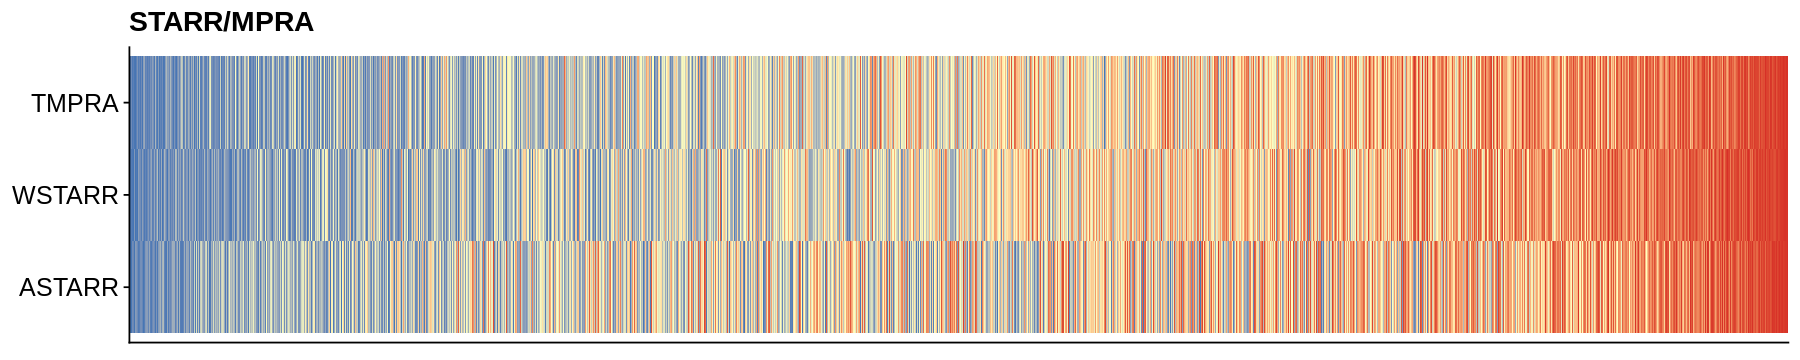

In [74]:
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5
)
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "STARR/MPRA"
dat = dat_score_starrmpra

gpt = ggplot(dat, aes(x=Peak, y=Assay, fill=Score)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() + 
    theme_text +
    theme_fill +
    theme_legend

gpt_score_starrmpra = gpt + theme(legend.position = "none")

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

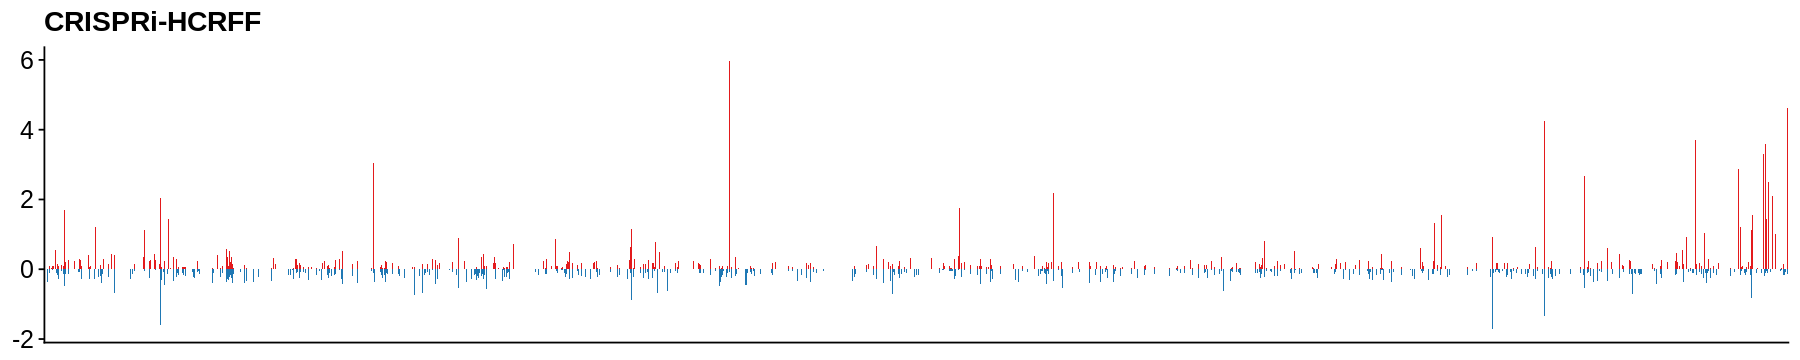

In [75]:
theme_fill = scale_fill_manual(
    values = c(
        "CRISPR_pos"="#e31a1c", 
        "CRISPR_neg"="#1f78b4")
)
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "CRISPRi-HCRFF"
dat = dat_score_crispr

gpt = ggplot(dat, aes(x=Peak, y=Score, fill=Group)) + 
    geom_bar(stat="identity", position="identity") + 
    labs(title = txt) +
    theme_cowplot() + 
    theme_text +
    theme_fill +
    theme_legend

gpt_score_crispr = gpt

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

## Import annotation: Enhancer

In [76]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.crispri_hcrff_casa.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% dplyr::mutate(Label = "CRISPR_CASA")

dat_peak_annot_casa = dat
print(dim(dat))
head(dat)

[1] 57  5


Peak,Annotation,Label,Count,Note
<chr>,<chr>,<chr>,<dbl>,<chr>
chr11_33868682_33871379,CRISPRi_HCRFF,CRISPR_CASA,1,LMO2
chr11_33880631_33881416,CRISPRi_HCRFF,CRISPR_CASA,1,LMO2
chr11_33881831_33882405,CRISPRi_HCRFF,CRISPR_CASA,1,LMO2
chr11_33936760_33937819,CRISPRi_HCRFF,CRISPR_CASA,1,LMO2
chr11_33941500_33942221,CRISPRi_HCRFF,CRISPR_CASA,1,LMO2
chr11_33944510_33945297,CRISPRi_HCRFF,CRISPR_CASA,3,CAPRIN1|CAT|LMO2


In [77]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.enhancer_junke_peak_starr.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_enh = dat
print(dim(dat))
head(dat)

[1] 29012     5


Peak,Annotation,Label,Count,Note
<chr>,<chr>,<chr>,<dbl>,<chr>
chr10_100009096_100010466,Enhancer,Enhancer_STARR,2,WSTARR|WSTARR
chr10_100185017_100187275,Enhancer,Enhancer_STARR,1,WSTARR
chr10_100228452_100230090,Enhancer,Enhancer_STARR,1,ASTARR
chr10_100267066_100268374,Enhancer,Enhancer_STARR,2,ASTARR|WSTARR
chr10_100285974_100287341,Enhancer,Enhancer_STARR,2,WSTARR|WSTARR
chr10_100346328_100347693,Enhancer,Enhancer_STARR,1,WSTARR


In [78]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.enhancer_zscore_junke_peak_starr.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% dplyr::mutate(Label = "Enhancer_STARR_ZScore")

dat_peak_annot_enh_zscore = dat
print(dim(dat))
head(dat)

[1] 14856     5


Peak,Annotation,Label,Count,Note
<chr>,<chr>,<chr>,<dbl>,<chr>
chr10_100185017_100187275,Enhancer_ZScore,Enhancer_STARR_ZScore,1,WSTARR
chr10_100346328_100347693,Enhancer_ZScore,Enhancer_STARR_ZScore,2,WSTARR|WSTARR
chr10_100373060_100374238,Enhancer_ZScore,Enhancer_STARR_ZScore,2,WSTARR|WSTARR
chr10_100528900_100530538,Enhancer_ZScore,Enhancer_STARR_ZScore,1,WSTARR
chr10_100535377_100536237,Enhancer_ZScore,Enhancer_STARR_ZScore,1,WSTARR
chr10_100912166_100913618,Enhancer_ZScore,Enhancer_STARR_ZScore,1,WSTARR


In [79]:
###
dat = bind_rows(dat_peak_annot_casa, dat_peak_annot_enh, dat_peak_annot_enh_zscore)
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat_annot_enhancer = dat
print(dim(dat))
head(dat)

[1] 1722    4
[1] 5166    3


Peak,Label,Value
<fct>,<chr>,<chr>
chrX_48996933_48997220,CRISPR_CASA,0
chr8_128298518_128298762,CRISPR_CASA,0
chr8_128242220_128242507,CRISPR_CASA,0
chr11_34024311_34024546,CRISPR_CASA,0
chr8_128189792_128190210,CRISPR_CASA,0
chr20_56703281_56703575,CRISPR_CASA,0


In [80]:
table(dat$Label, dat$Value)

                       
                           0    1
  CRISPR_CASA           1685   37
  Enhancer_STARR        1474  248
  Enhancer_STARR_ZScore 1583  139

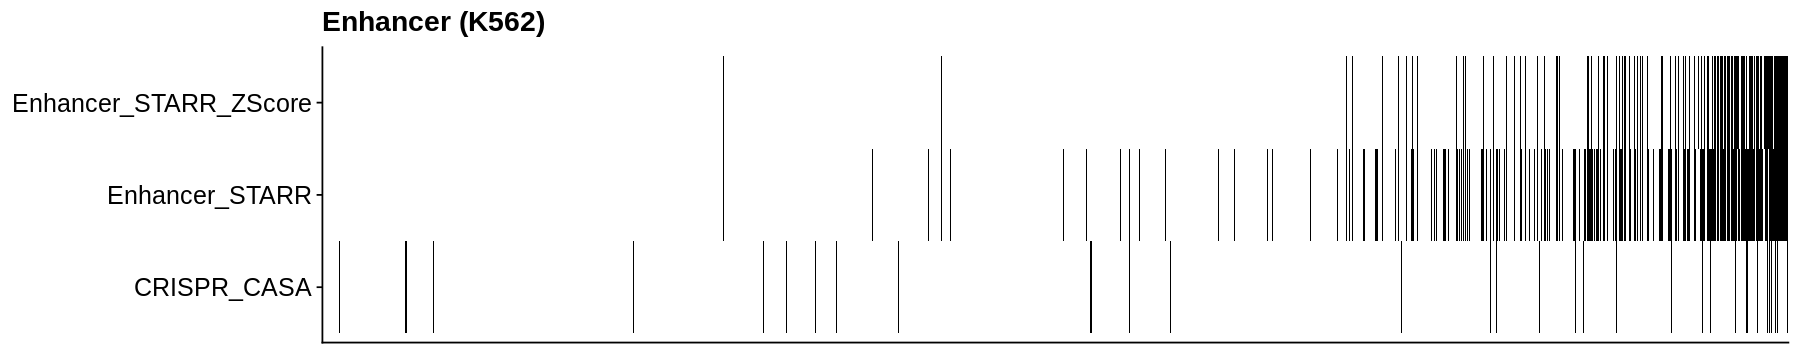

In [81]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "Enhancer (K562)"
dat = dat_annot_enhancer

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_enhancer = gpt
options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

## Import annotation: TSS

In [82]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.tss_pol2.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_tss_pol2 = dat
print(dim(dat))
head(dat)

[1] 15191     4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,TSS_POL2,TSS,1
chr10_100185017_100187275,TSS_POL2,TSS,1
chr10_100228452_100230090,TSS_POL2,TSS,1
chr10_100267066_100268374,TSS_POL2,TSS,1
chr10_100285974_100287341,TSS_POL2,TSS,1
chr10_100346328_100347693,TSS_POL2,TSS,1


In [83]:
###
dat = dat_peak_annot_tss_pol2
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat_annot_tss_pol2 = dat
print(dim(dat))
head(dat)

[1] 1722    2
[1] 1722    3


Peak,Label,Value
<fct>,<chr>,<chr>
chrX_48996933_48997220,TSS,0
chr8_128298518_128298762,TSS,0
chr8_128242220_128242507,TSS,0
chr11_34024311_34024546,TSS,0
chr8_128189792_128190210,TSS,0
chr20_56703281_56703575,TSS,0


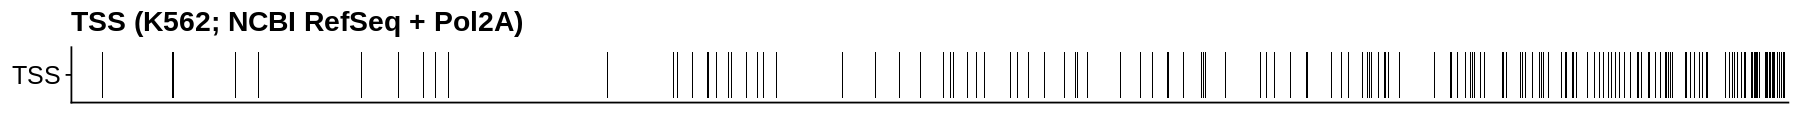

In [84]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "TSS (K562; NCBI RefSeq + Pol2A)"
dat = dat_annot_tss_pol2

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_tss_pol2 = gpt
options(repr.plot.height=1, repr.plot.width=15)
print(gpt)

## Import annotation: ChromHMM

In [85]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.chromHMM.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_chromhmm = dat
print(dim(dat))
head(dat)

[1] 343446      4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,ChromHMM,TssFlnk,3
chr10_100009096_100010466,ChromHMM,TssFlnkD,2
chr10_100020710_100021134,ChromHMM,Biv,1
chr10_100020710_100021134,ChromHMM,ReprPC,1
chr10_1000372_1000820,ChromHMM,Tx,1
chr10_100045961_100046653,ChromHMM,Quies,1


In [86]:
###
dat = dat_peak_annot_chromhmm
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat_annot_chromhmm = dat
print(dim(dat))
head(dat)

[1] 1722   16
[1] 25830     3


Peak,Label,Value
<fct>,<chr>,<chr>
chrX_48996933_48997220,Biv,0
chr8_128298518_128298762,Biv,0
chr8_128242220_128242507,Biv,0
chr11_34024311_34024546,Biv,0
chr8_128189792_128190210,Biv,0
chr20_56703281_56703575,Biv,0


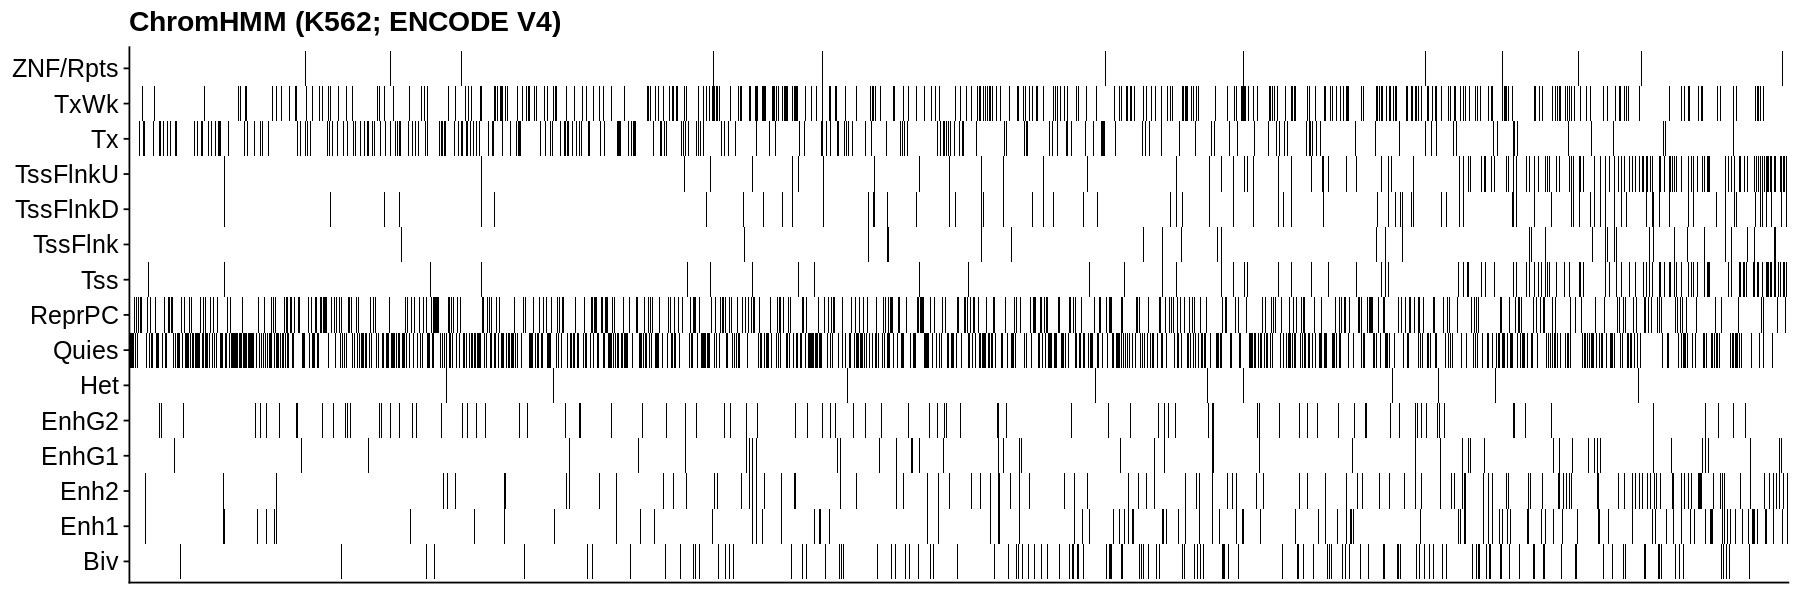

In [87]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "ChromHMM (K562; ENCODE V4)"
dat = dat_annot_chromhmm

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_chromhmm = gpt
options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

## Import annotation: cCREs

In [88]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.ccre_v4.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_ccre = dat
print(dim(dat))
head(dat)

[1] 277309      4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,ccre_v4,CA-H3K4me3,2
chr10_100009096_100010466,ccre_v4,Low-DNase,1
chr10_100009096_100010466,ccre_v4,PLS,1
chr10_100009096_100010466,ccre_v4,pELS,1
chr10_100020710_100021134,ccre_v4,Low-DNase,2
chr10_100045961_100046653,ccre_v4,CA-CTCF,1


In [89]:
###
dat = dat_peak_annot_ccre
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat_annot_ccre = dat
print(dim(dat))
head(dat)

[1] 1722    9
[1] 13776     3


Peak,Label,Value
<fct>,<chr>,<chr>
chrX_48996933_48997220,CA-CTCF,0
chr8_128298518_128298762,CA-CTCF,0
chr8_128242220_128242507,CA-CTCF,0
chr11_34024311_34024546,CA-CTCF,0
chr8_128189792_128190210,CA-CTCF,0
chr20_56703281_56703575,CA-CTCF,0


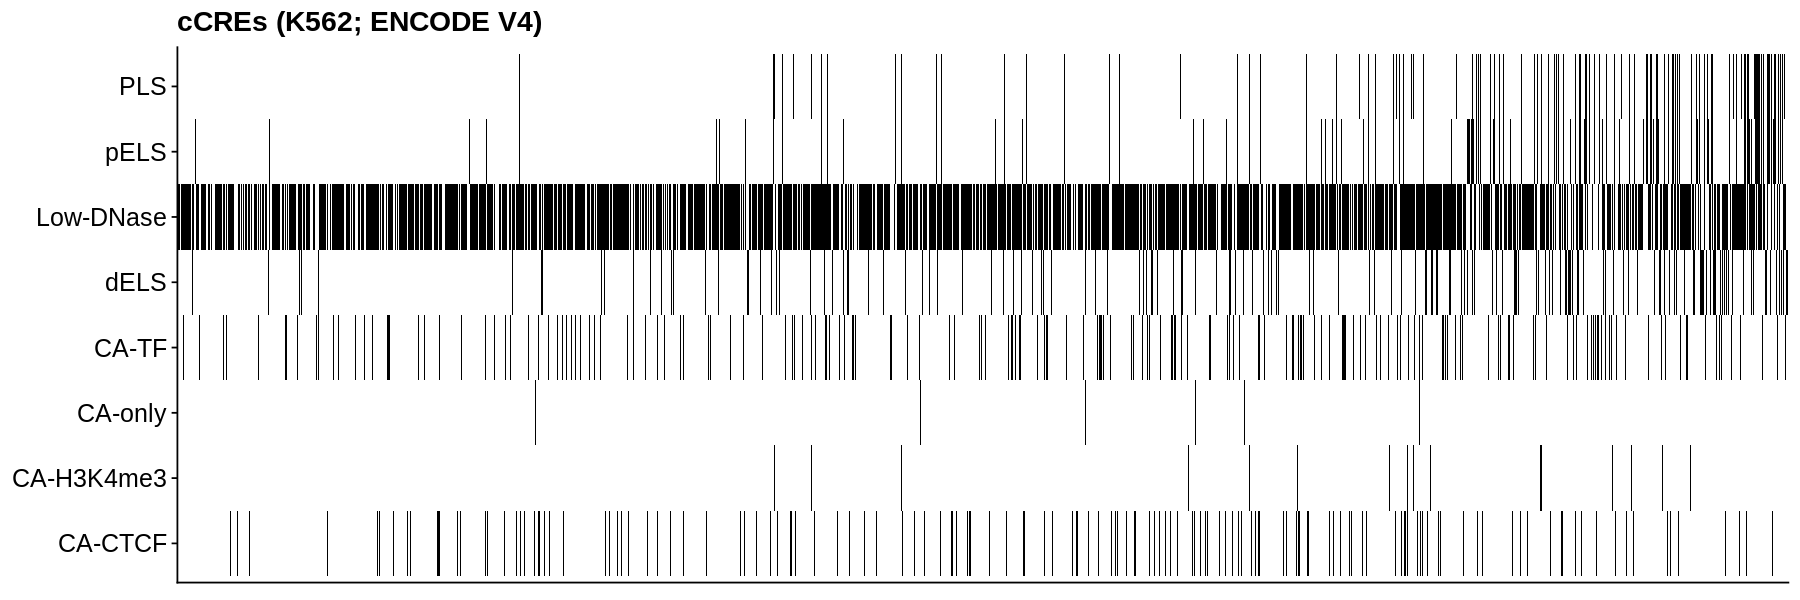

In [90]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "cCREs (K562; ENCODE V4)"
dat = dat_annot_ccre

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_ccre = gpt
options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

## Import annotation: TF subset

In [91]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.chipseq_tf_subset.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_chipseq_tf_subset = dat
print(dim(dat))
head(dat)

[1] 270491      4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,ChIPseq_TF,YY1,1
chr10_100185017_100187275,ChIPseq_TF,YY1,1
chr10_100228452_100230090,ChIPseq_TF,YY1,1
chr10_100267066_100268374,ChIPseq_TF,YY1,1
chr10_100285974_100287341,ChIPseq_TF,YY1,2
chr10_100346328_100347693,ChIPseq_TF,YY1,1


In [92]:
###
dat = dat_peak_annot_chipseq_tf_subset
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat_annot_chipseq_tf_subset = dat
print(dim(dat))
head(dat)

[1] 1722   17
[1] 27552     3


Peak,Label,Value
<fct>,<chr>,<chr>
chrX_48996933_48997220,ATF1,0
chr8_128298518_128298762,ATF1,0
chr8_128242220_128242507,ATF1,0
chr11_34024311_34024546,ATF1,0
chr8_128189792_128190210,ATF1,0
chr20_56703281_56703575,ATF1,0


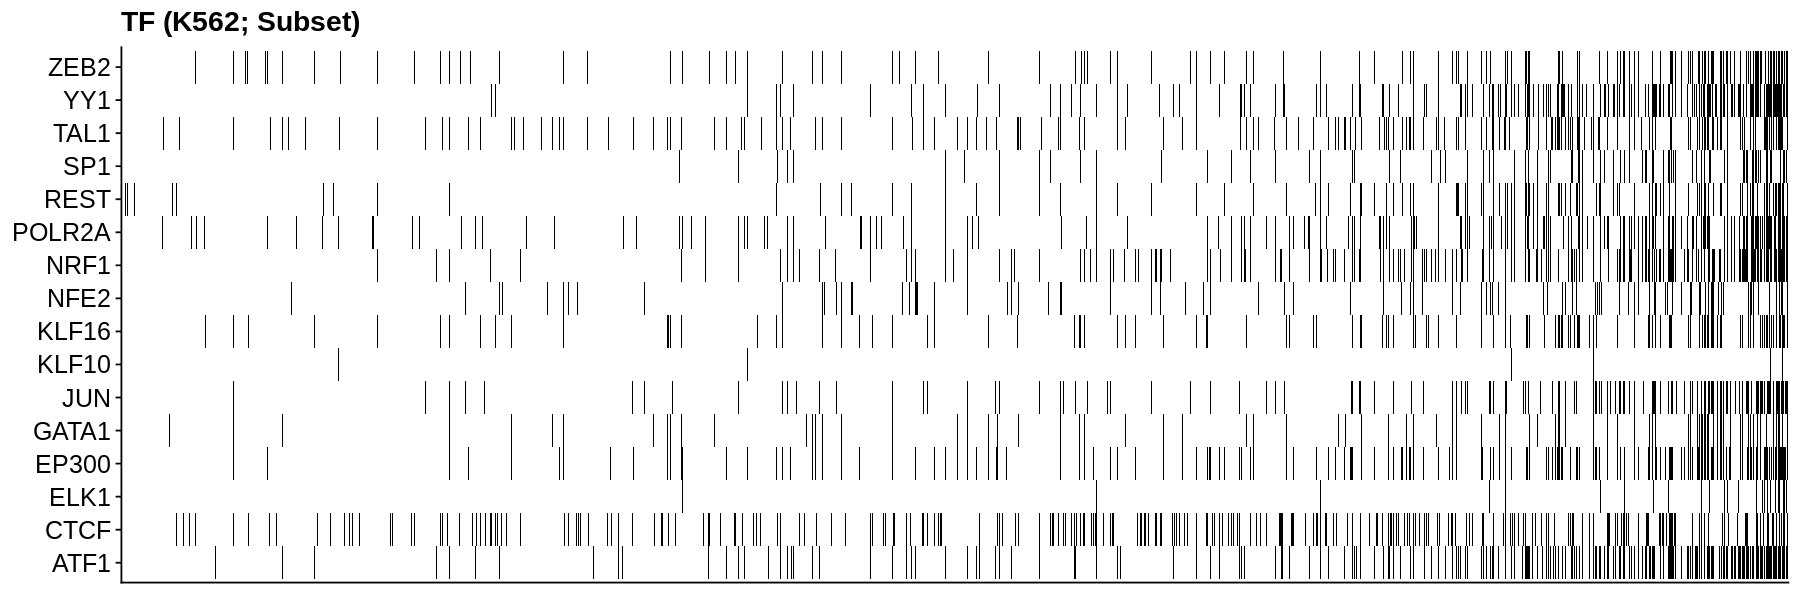

In [93]:
theme_fill = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")
#theme_legend = theme(
#    legend.position = "bottom", 
#    legend.key.size = unit(1, 'cm'),
#    legend.title = element_text(size=20),
#    legend.text = element_text(size=10))

txt = "TF (K562; Subset)"
dat = dat_annot_chipseq_tf_subset

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_chipseq_tf_subset = gpt
options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

## Import annotation: TF

In [94]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.chipseq_tf.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_chipseq_tf = dat
print(dim(dat))
head(dat)

[1] 5716412       4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,ChIPseq_TF,CTCF_ENCFF769AUF,1
chr10_100045961_100046653,ChIPseq_TF,CTCF_ENCFF769AUF,1
chr10_100228452_100230090,ChIPseq_TF,CTCF_ENCFF769AUF,1
chr10_100240591_100241246,ChIPseq_TF,CTCF_ENCFF769AUF,1
chr10_100338359_100339077,ChIPseq_TF,CTCF_ENCFF769AUF,1
chr10_100342247_100342824,ChIPseq_TF,CTCF_ENCFF769AUF,1


In [95]:
###
dat = dat_peak_annot_chipseq_tf
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat_annot_chipseq_tf = dat
print(dim(dat))
head(dat)

[1] 1722  734
[1] 1262226       3


Peak,Label,Value
<fct>,<chr>,<chr>
chrX_48996933_48997220,ADNP_ENCFF739AJO,0
chr8_128298518_128298762,ADNP_ENCFF739AJO,0
chr8_128242220_128242507,ADNP_ENCFF739AJO,0
chr11_34024311_34024546,ADNP_ENCFF739AJO,0
chr8_128189792_128190210,ADNP_ENCFF739AJO,0
chr20_56703281_56703575,ADNP_ENCFF739AJO,0


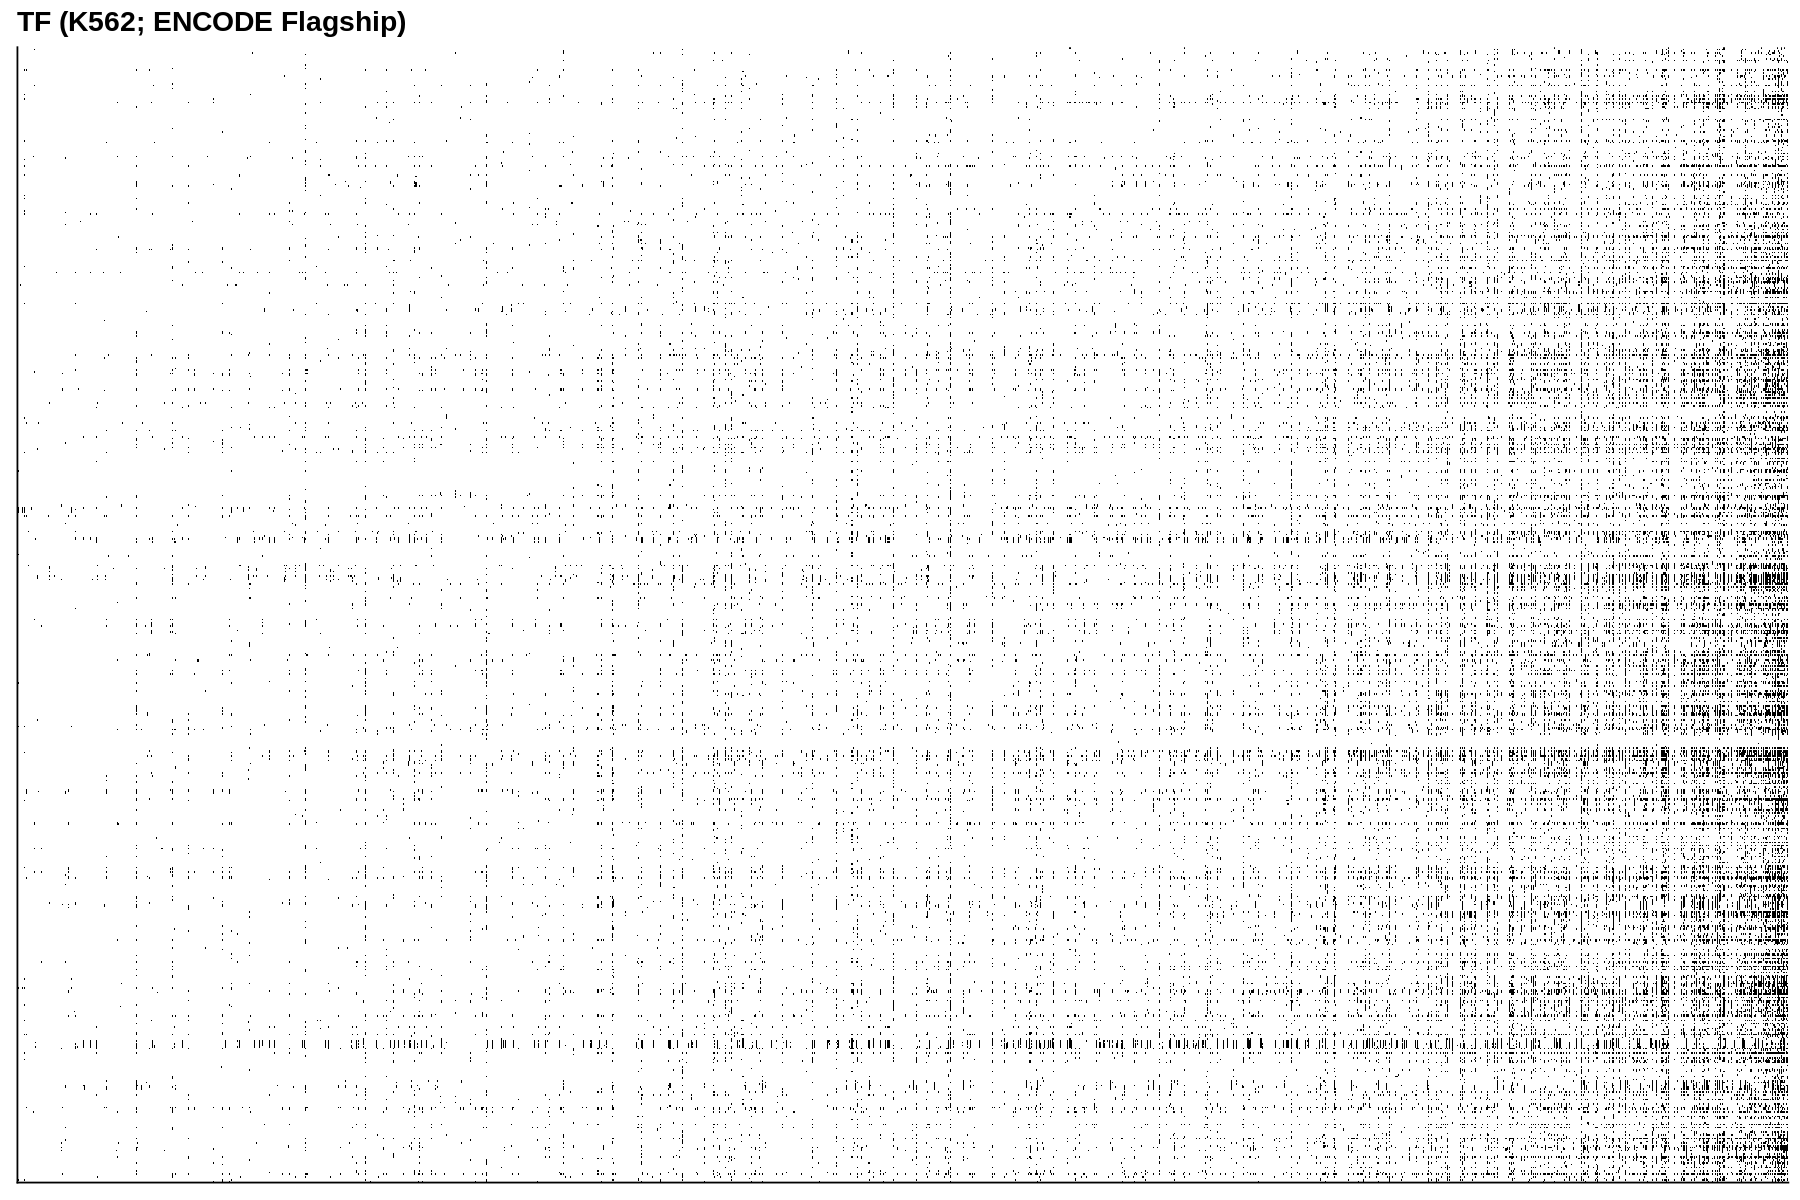

In [96]:
theme_fill = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "bold", size = 17)
)
theme_legend = theme(legend.position = "none")

txt = "TF (K562; ENCODE Flagship)"
dat = dat_annot_chipseq_tf

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_chipseq_tf = gpt
options(repr.plot.height=10, repr.plot.width=15)
print(gpt)

## Final plot

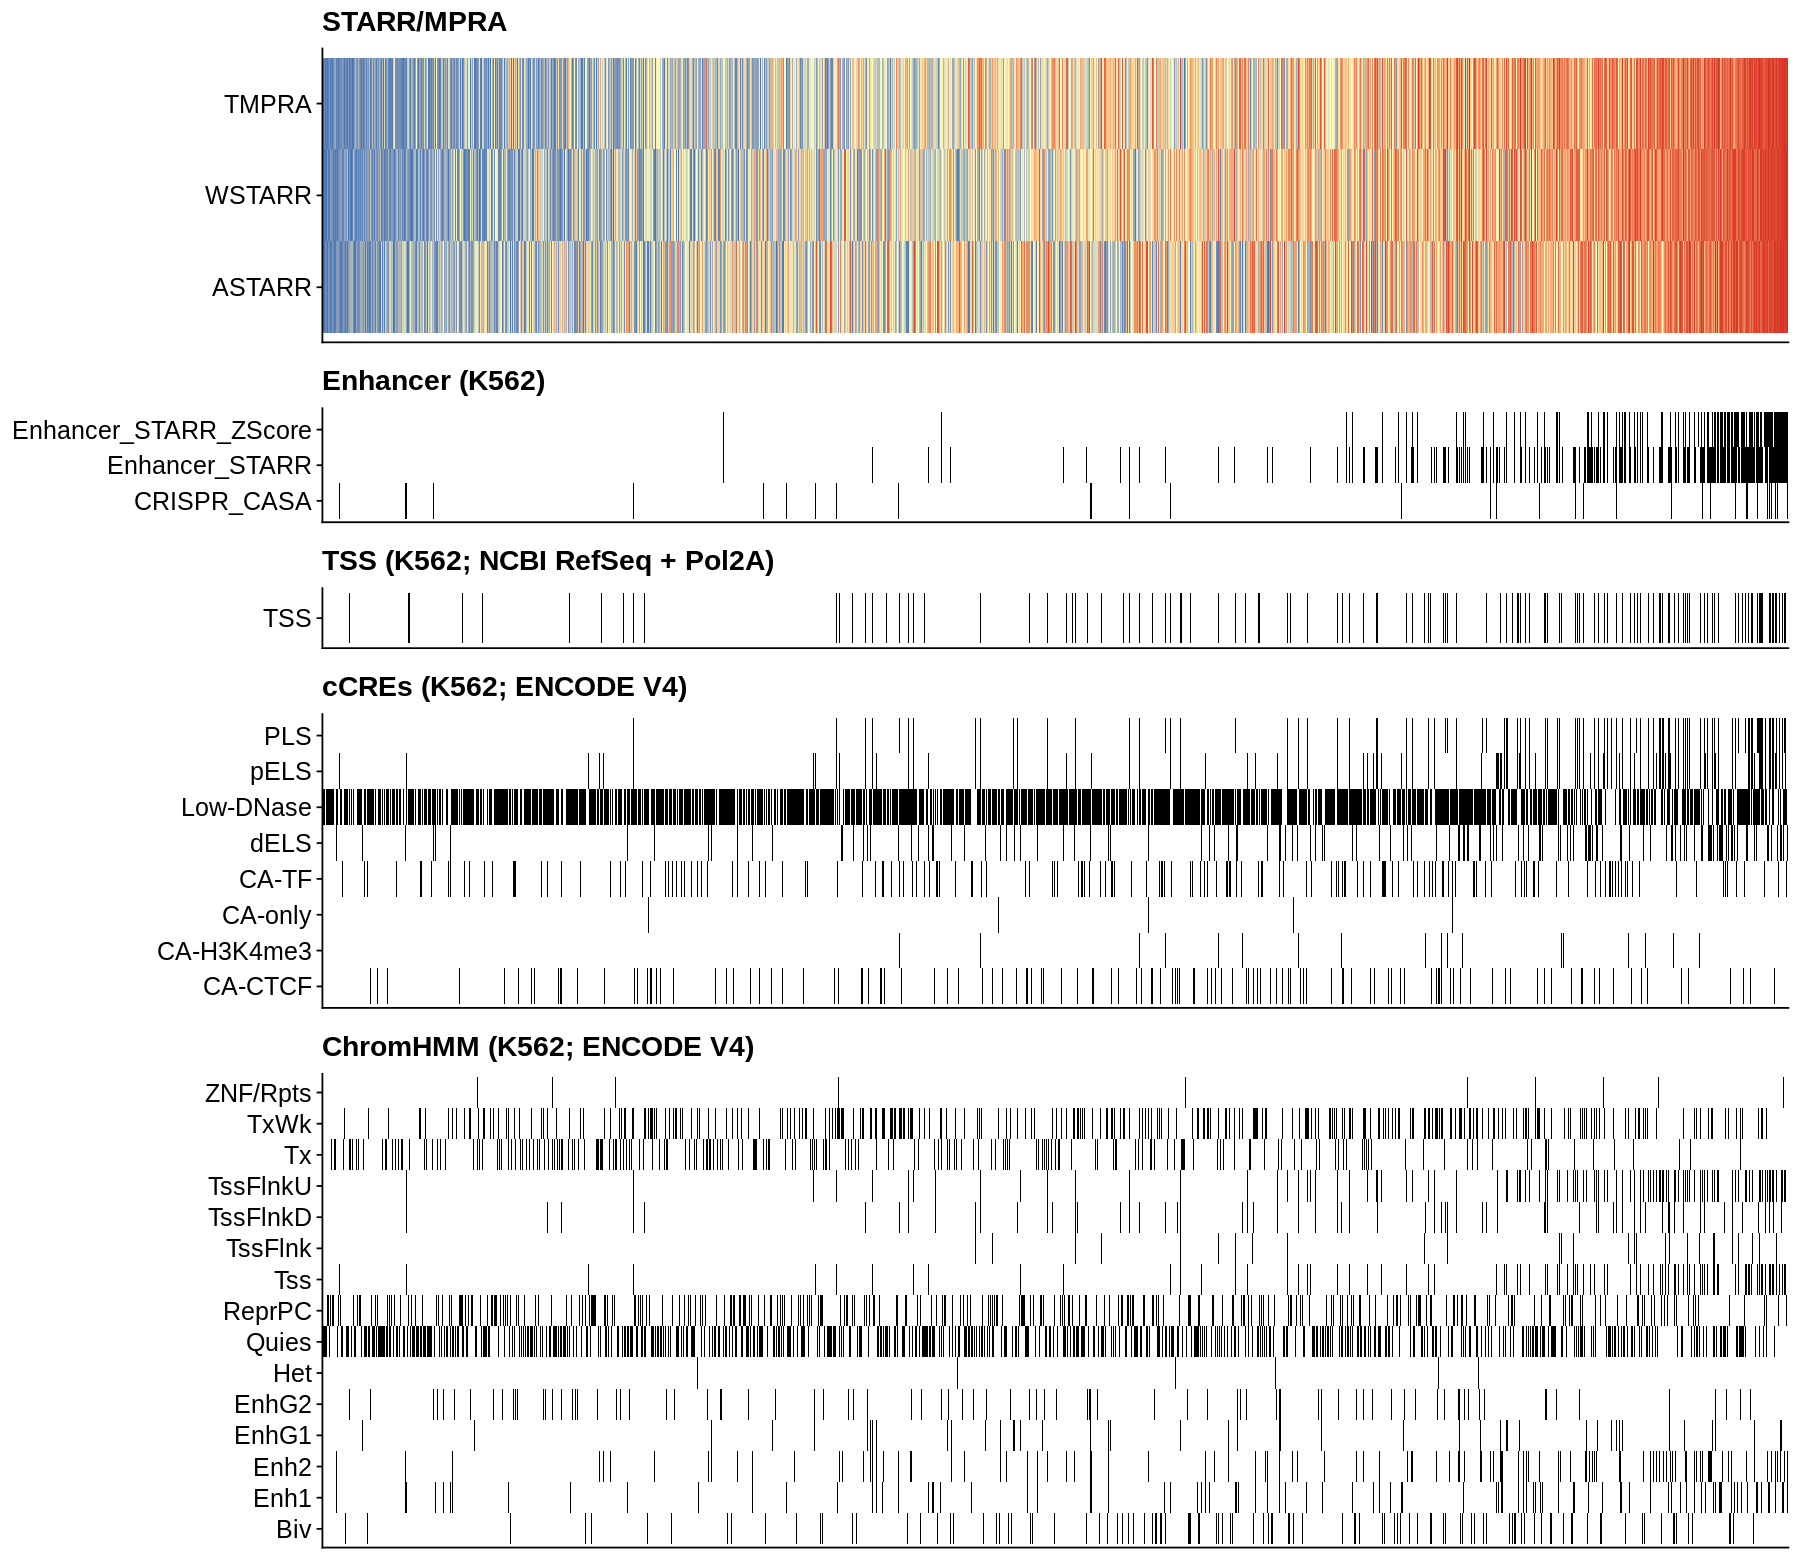

In [106]:
rel_heights = c(2, 1, 0.7, 2, 3)
lst_gpt = list(
    gpt_score_starrmpra,
    gpt_annot_enhancer,
    gpt_annot_tss_pol2,
    gpt_annot_ccre,
    gpt_annot_chromhmm
) 

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights)

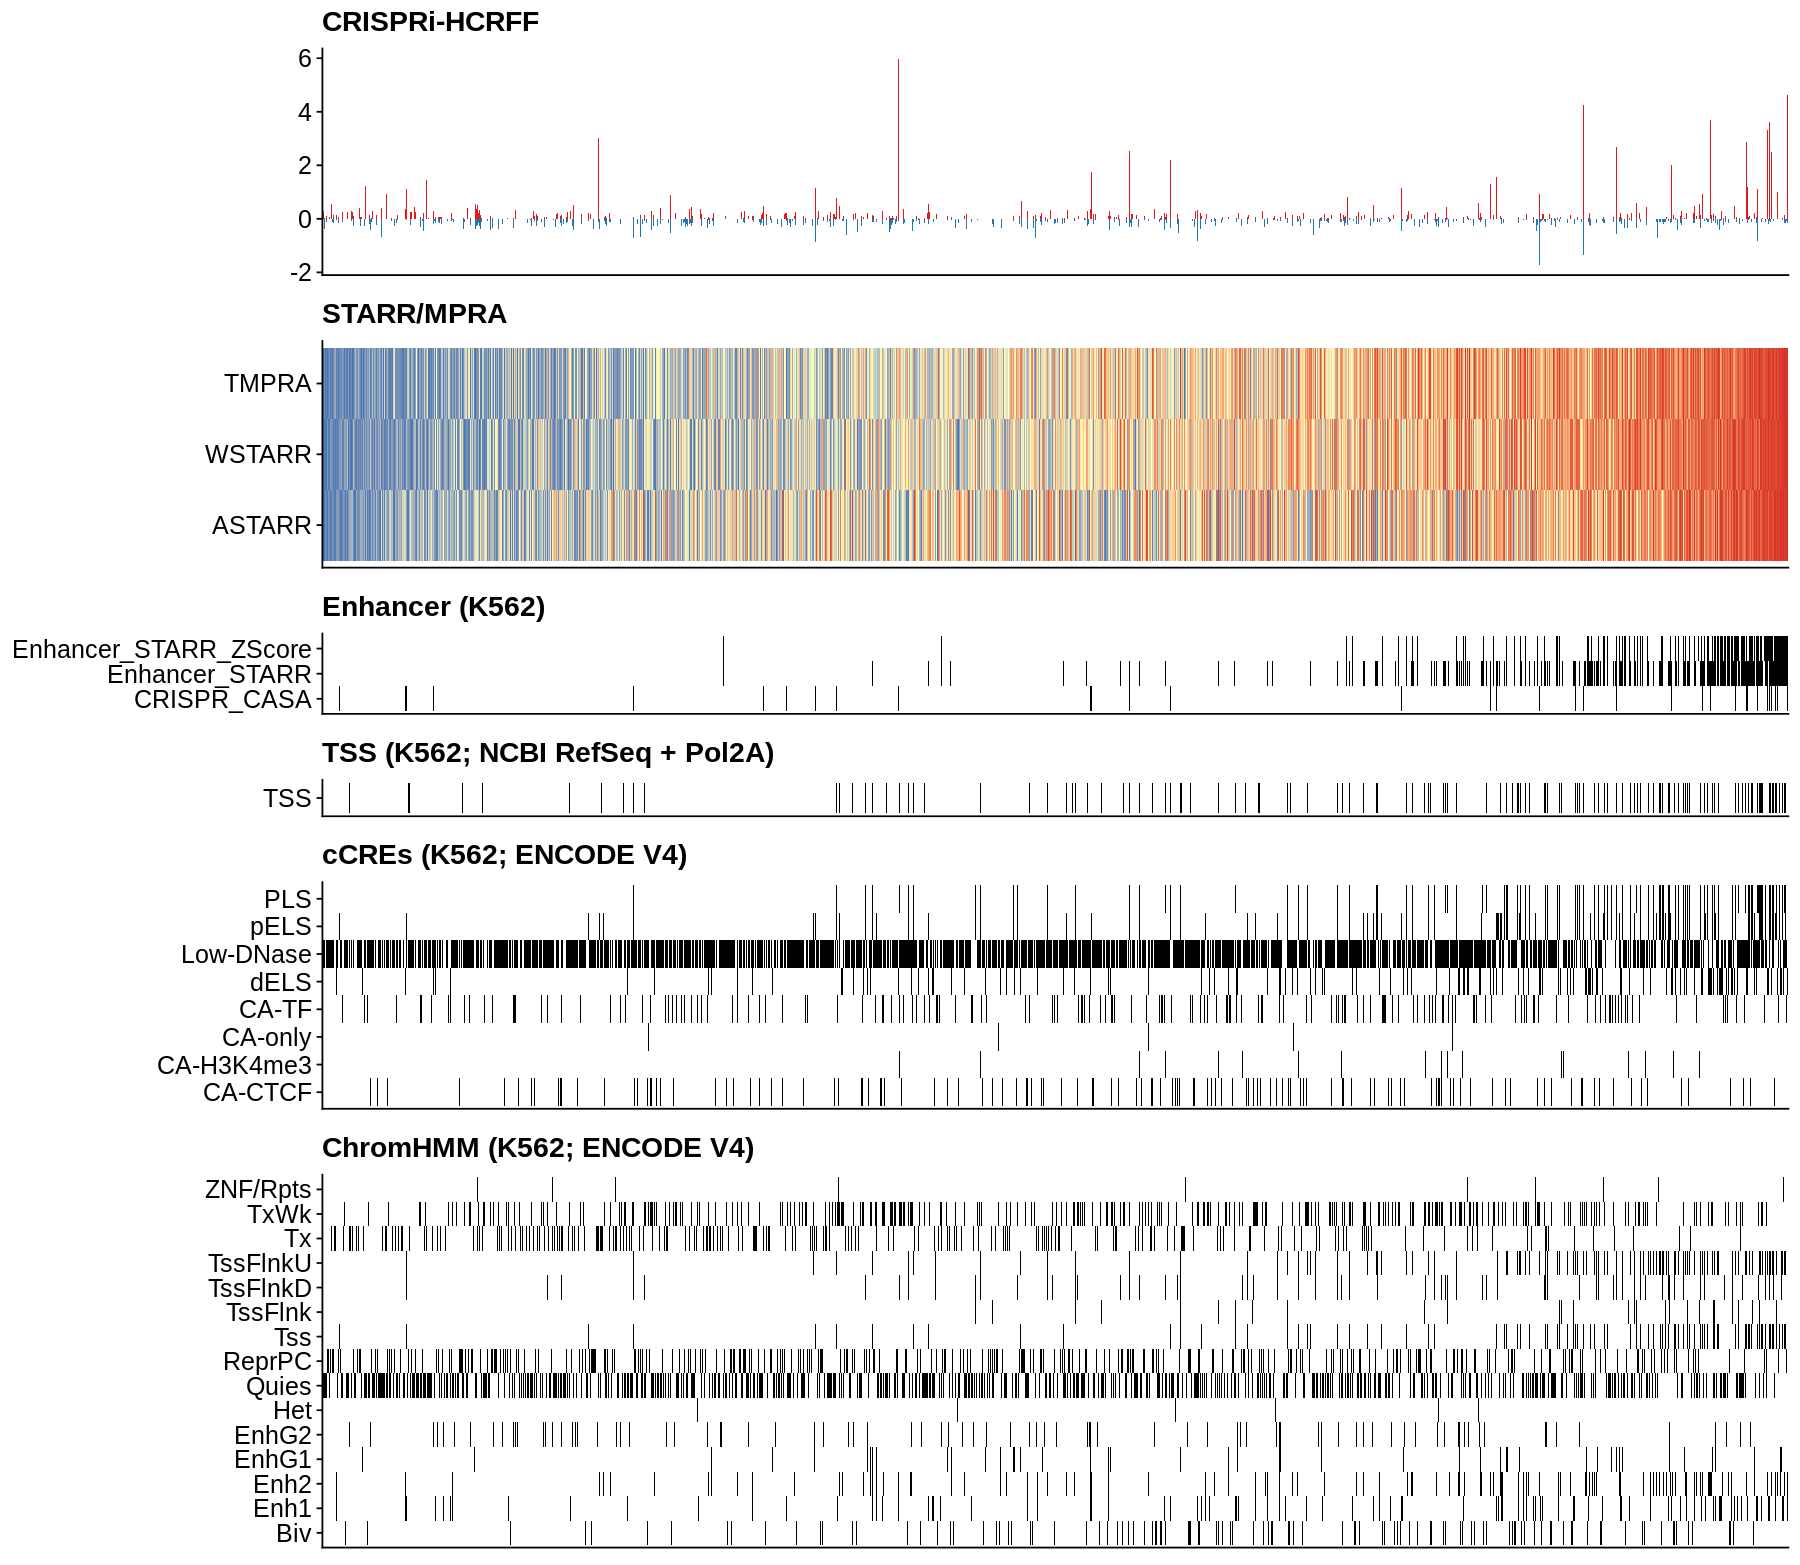

In [107]:
rel_heights_add_crispr = c(rel_heights[1], rel_heights)
lst_gpt_add_crispr = append(list(gpt_score_crispr), lst_gpt)

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt_add_crispr,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights_add_crispr)

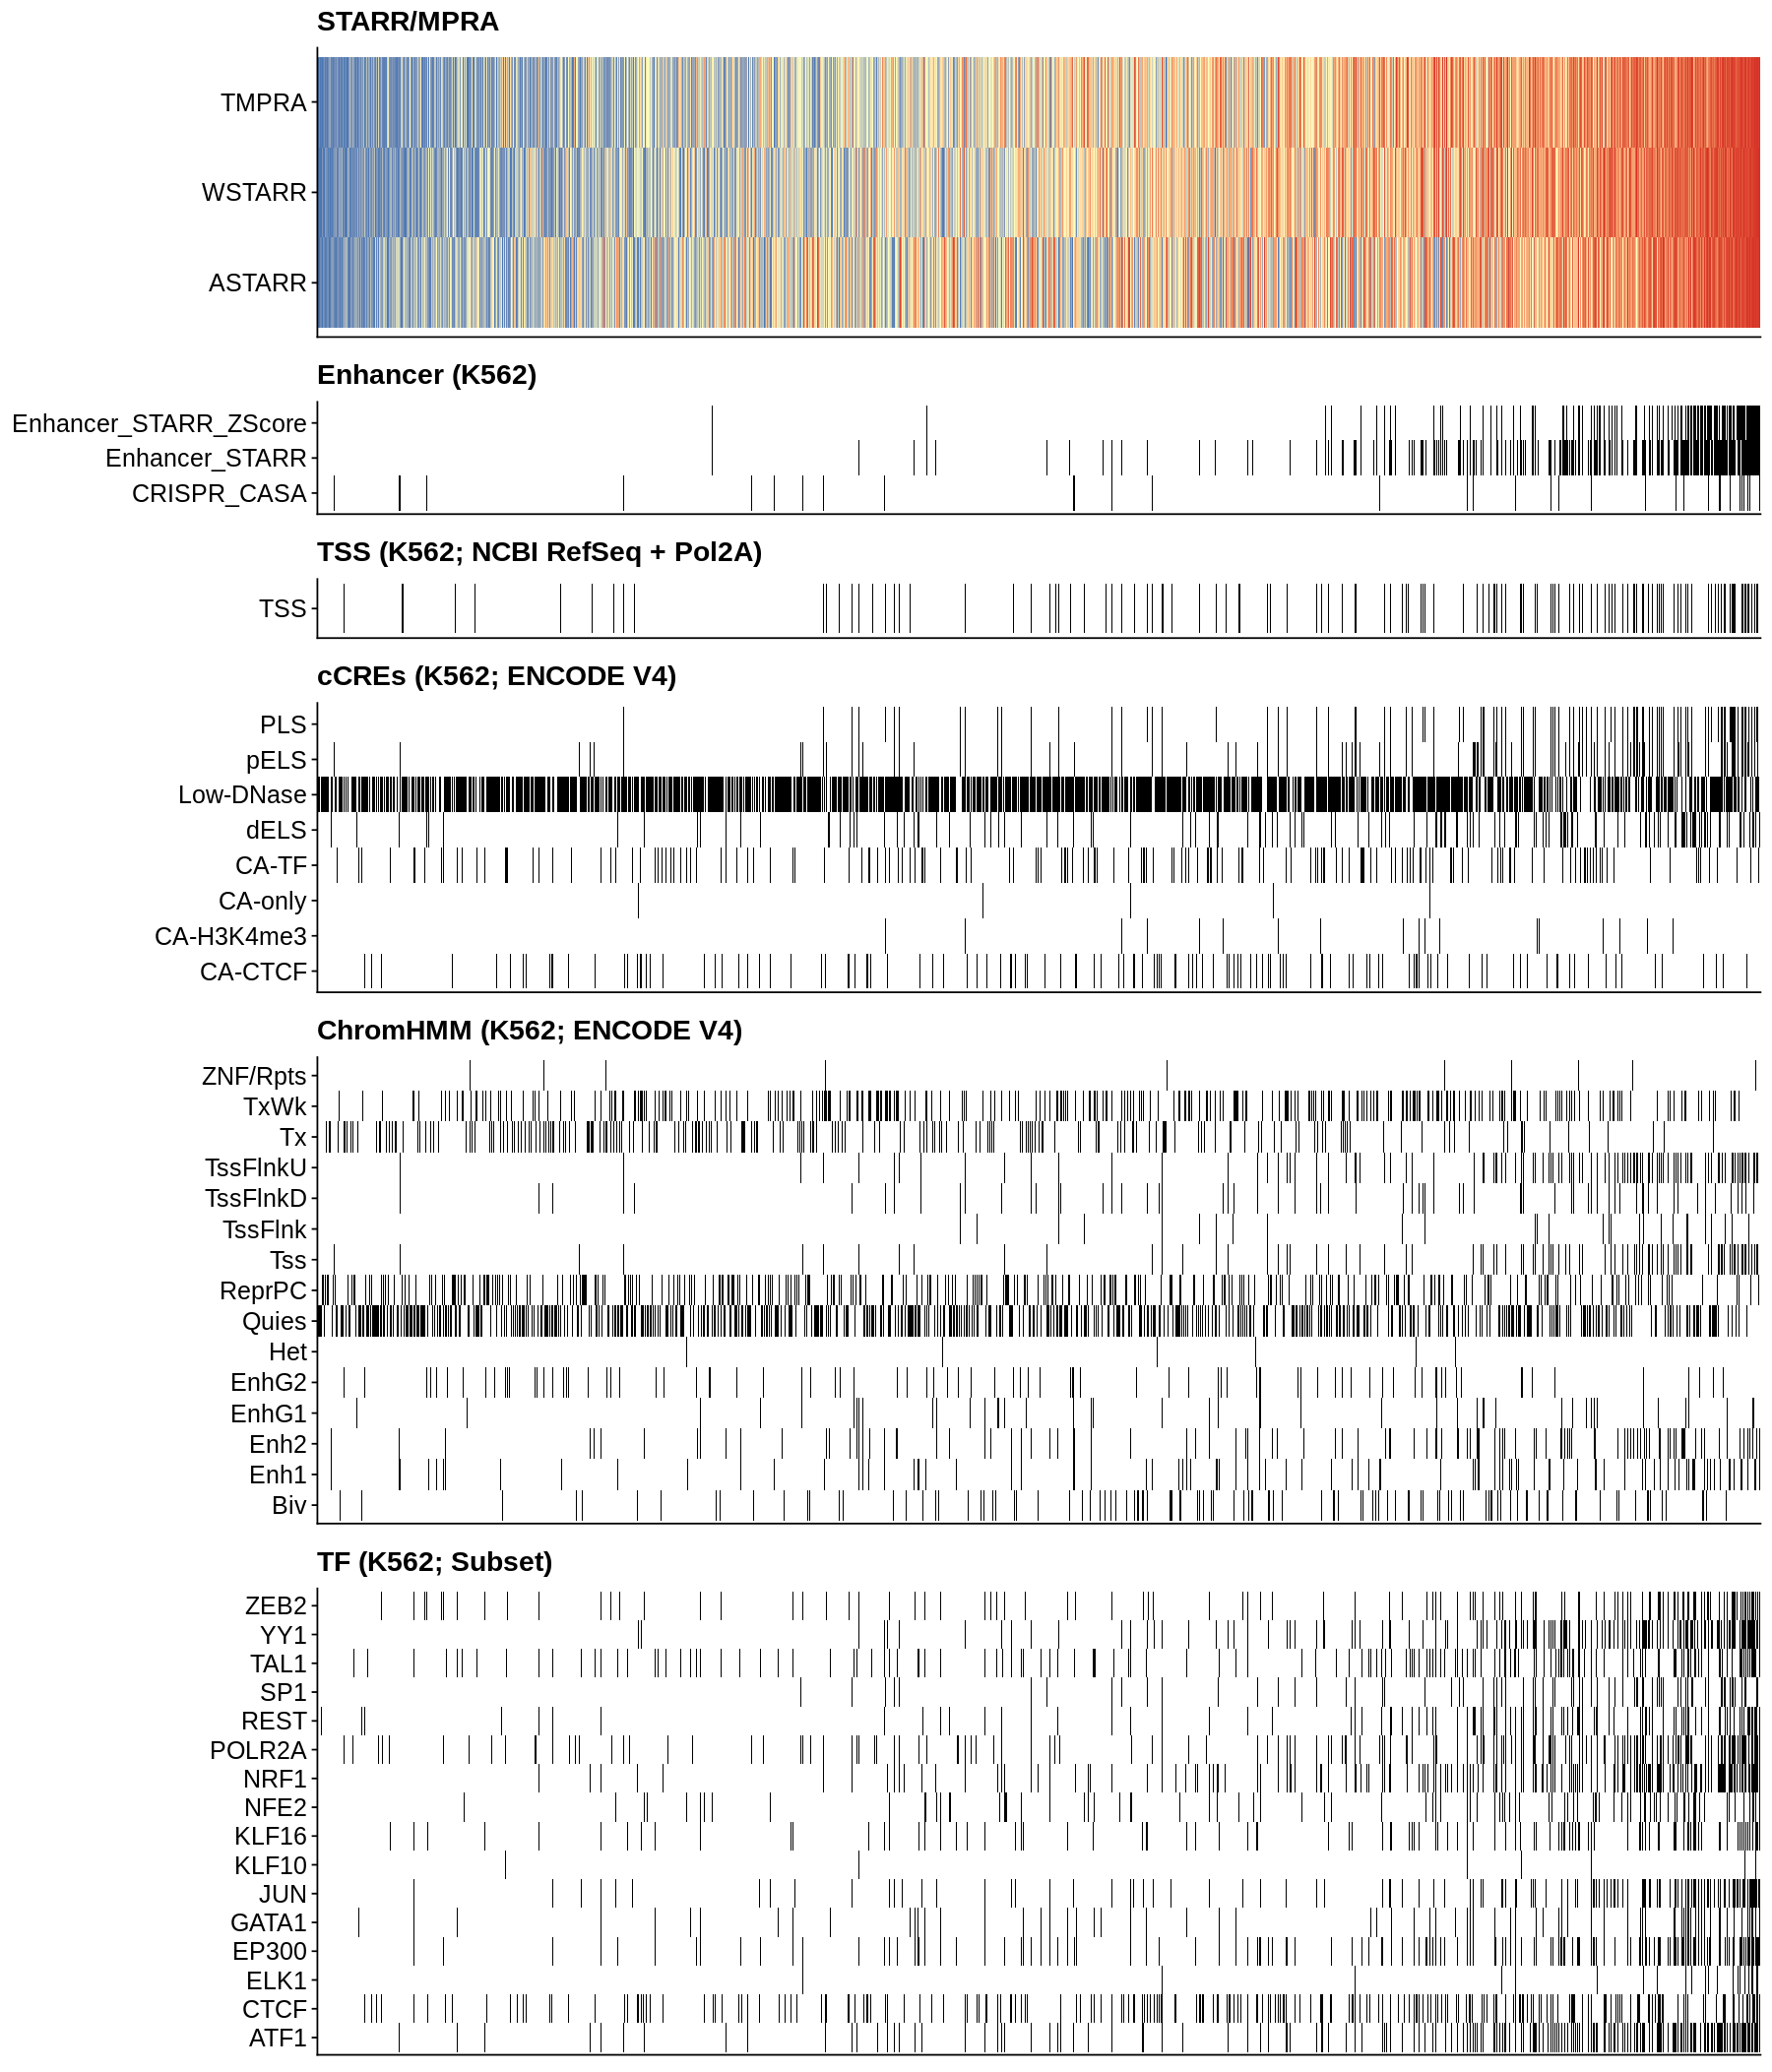

In [108]:
rel_heights = c(2, 1, 0.7, 2, 3, 3)
lst_gpt = list(
    gpt_score_starrmpra,
    gpt_annot_enhancer,
    gpt_annot_tss_pol2,
    gpt_annot_ccre,
    gpt_annot_chromhmm,
    gpt_annot_chipseq_tf_subset
) 

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights)

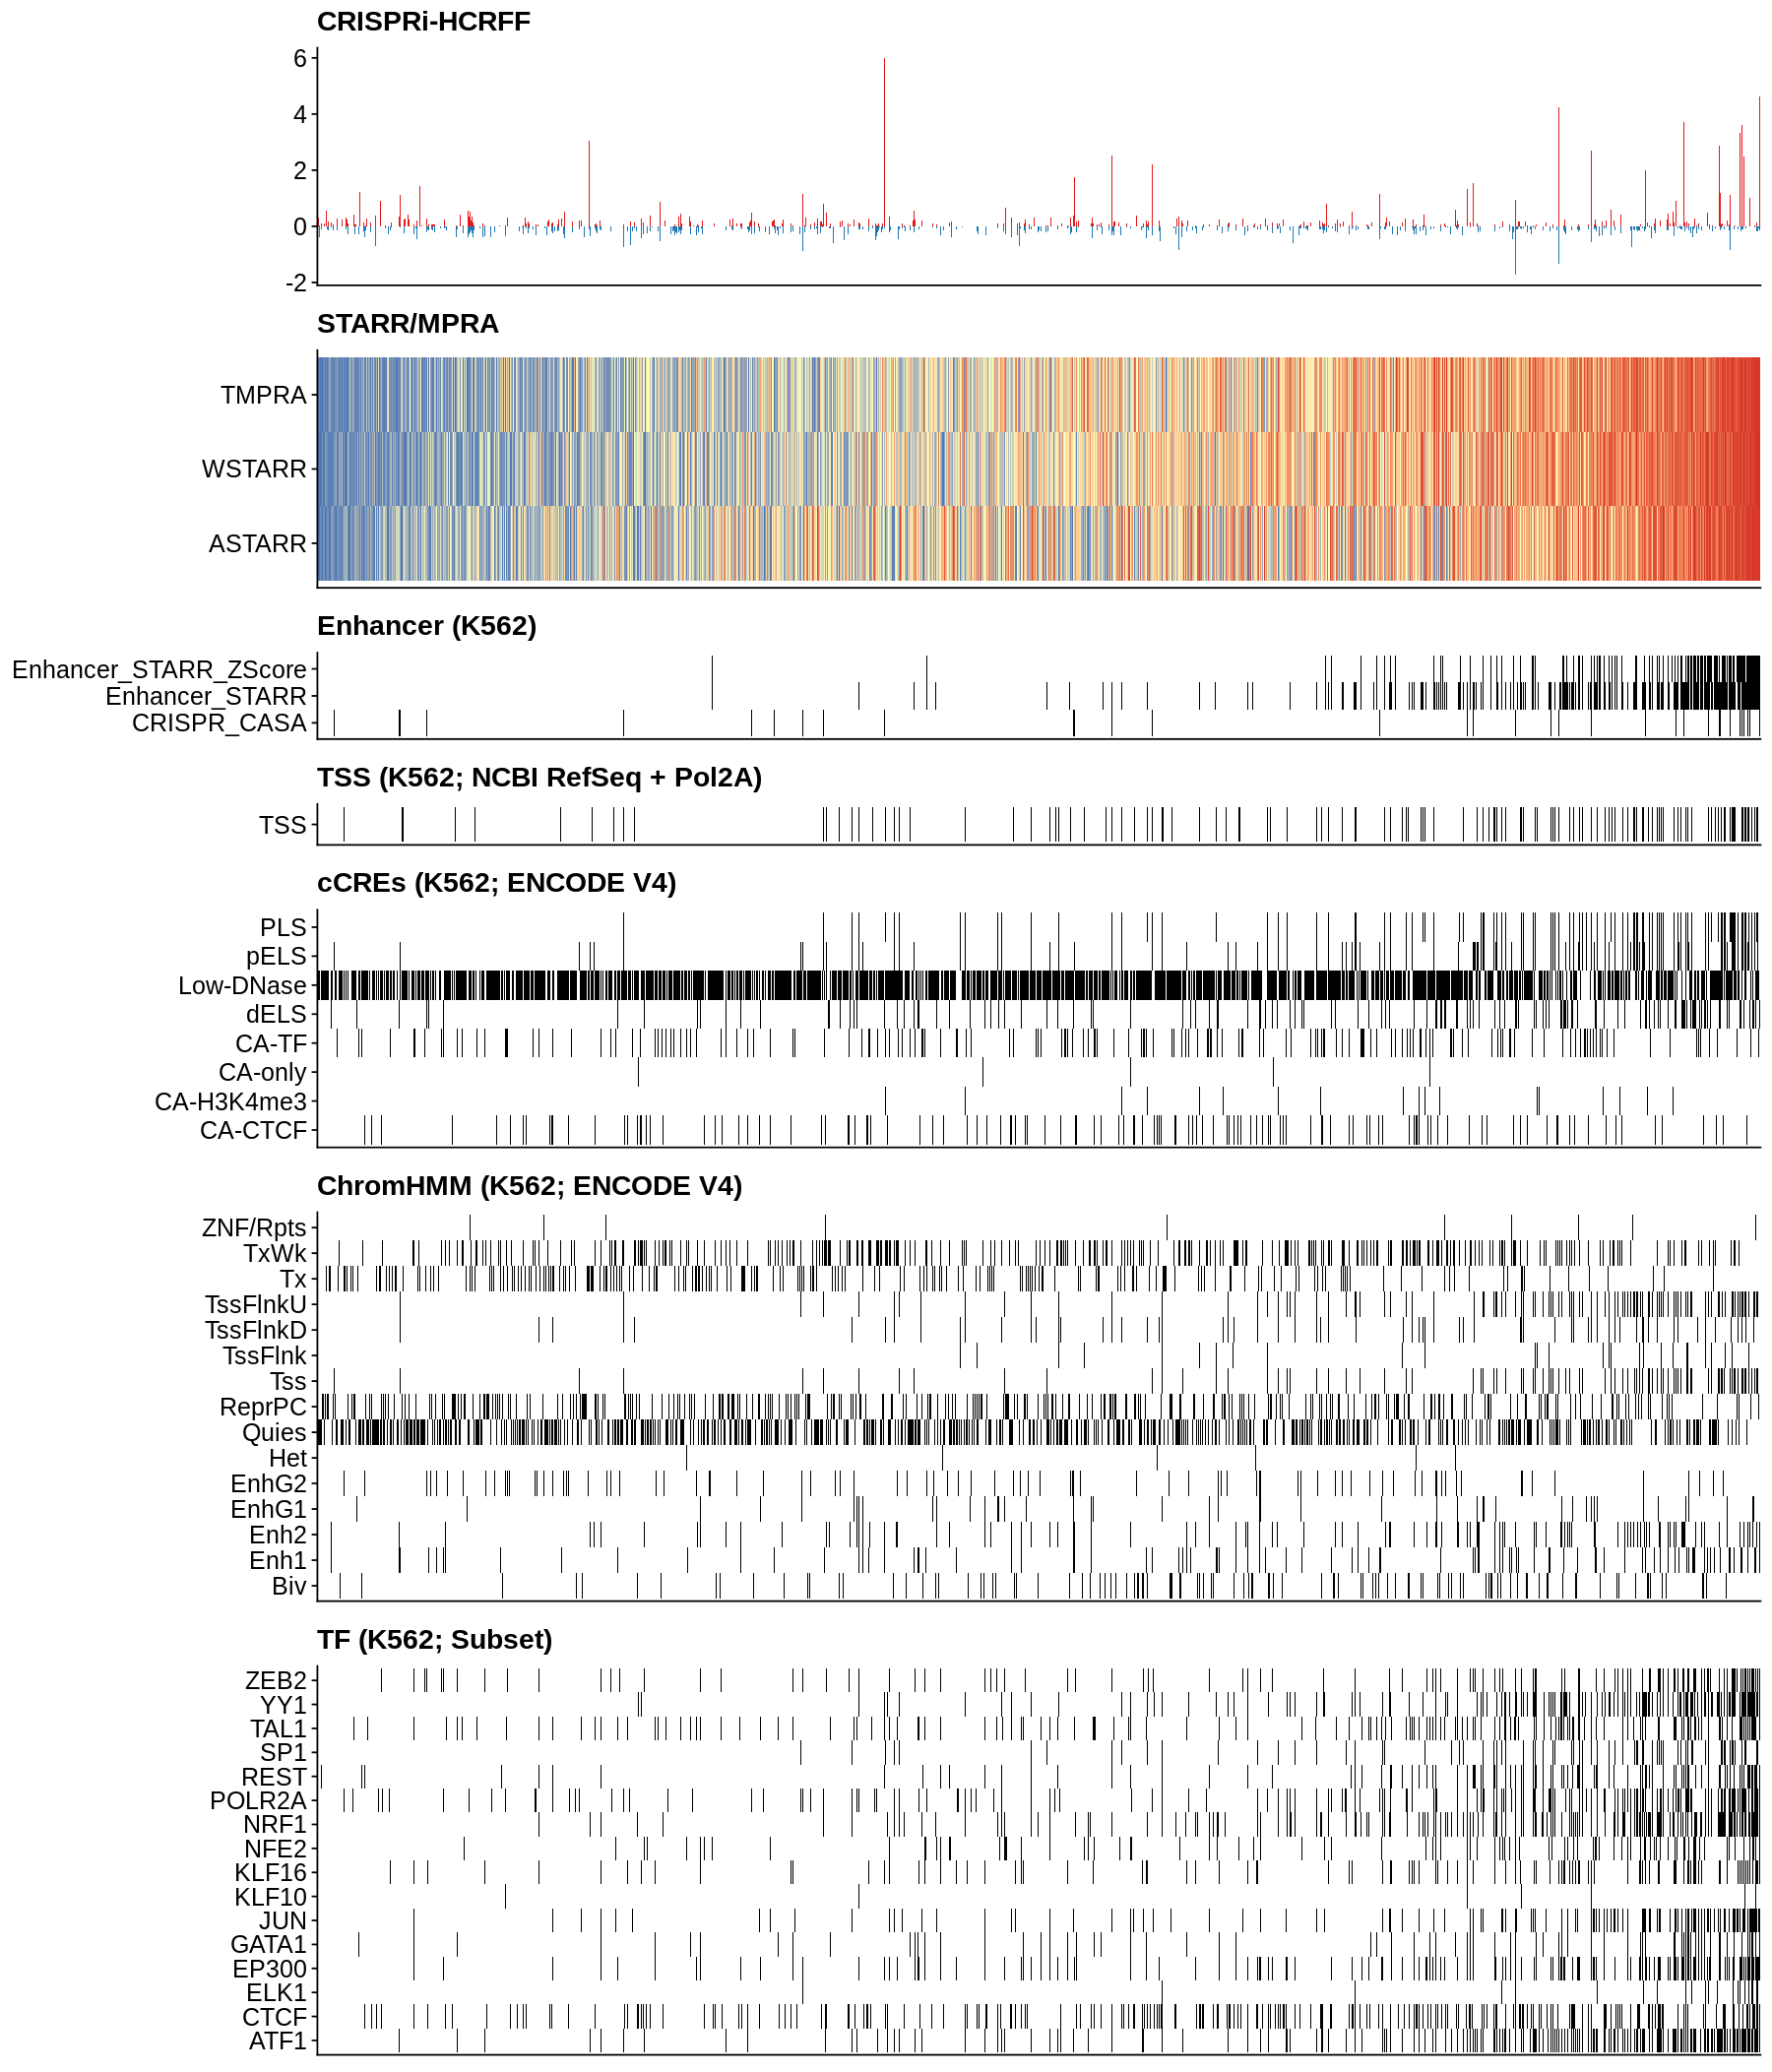

In [109]:
rel_heights_add_crispr = c(rel_heights[1], rel_heights)
lst_gpt_add_crispr = append(list(gpt_score_crispr), lst_gpt)

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt_add_crispr,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights_add_crispr)

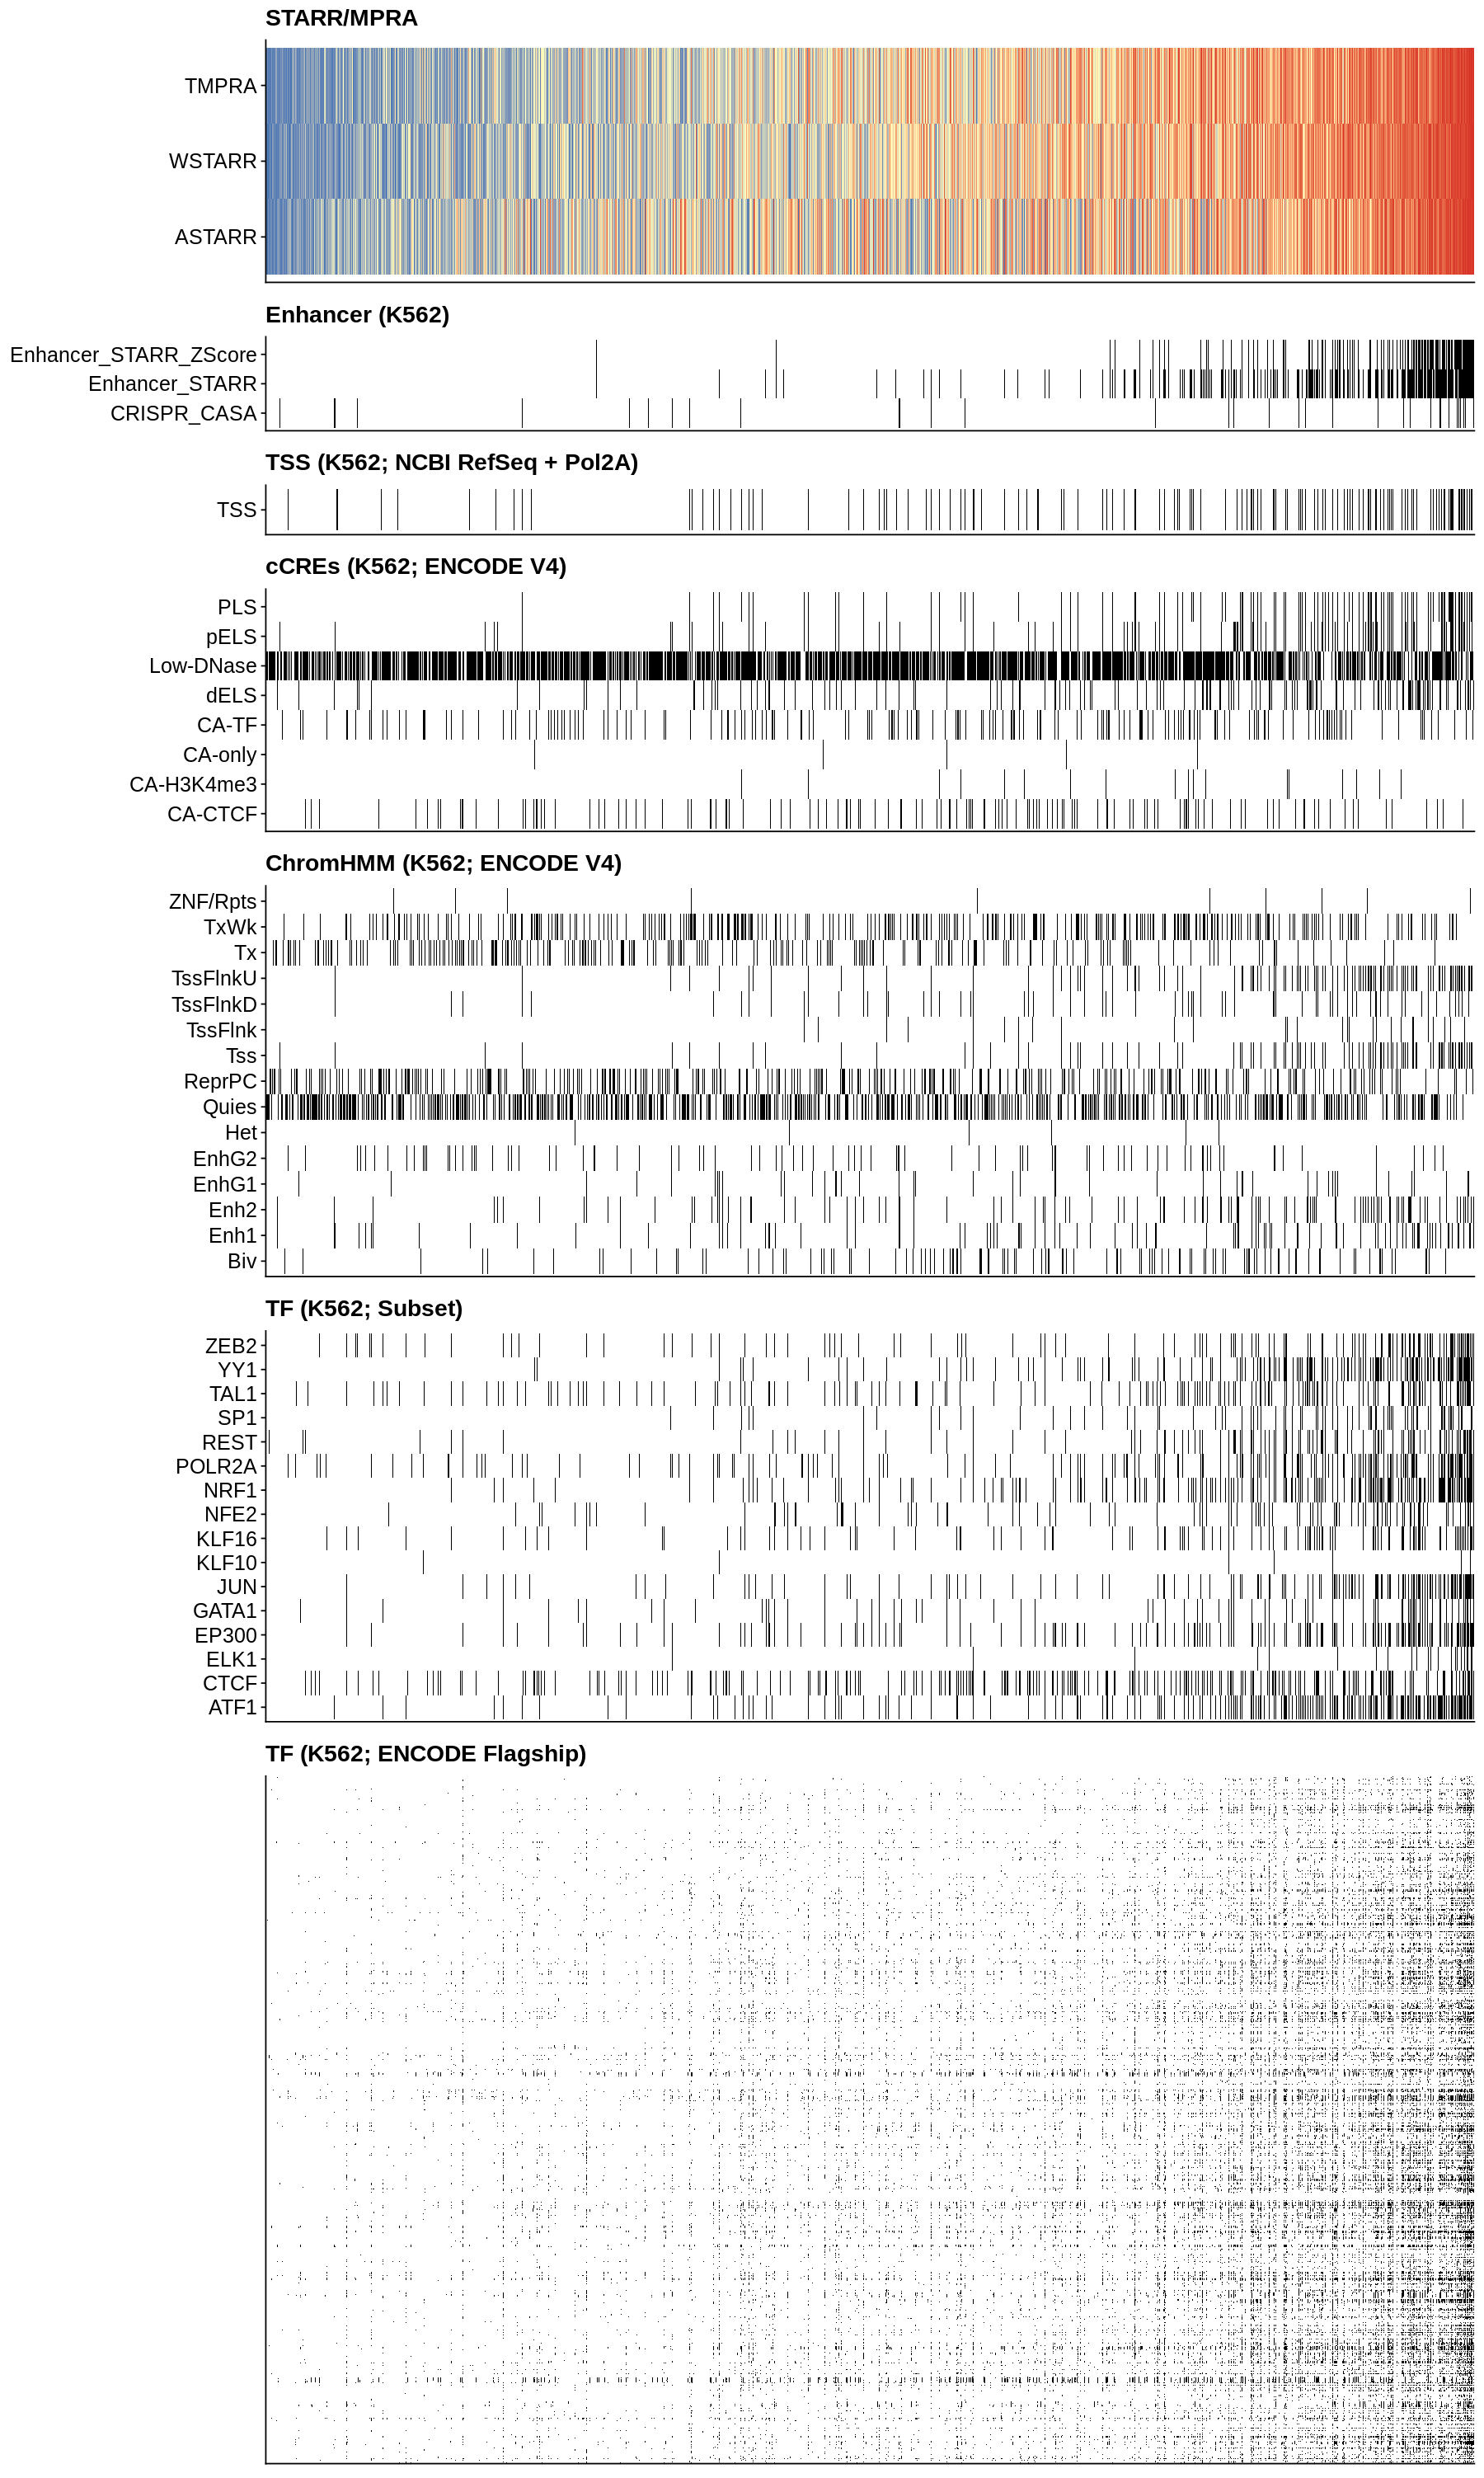

In [110]:
rel_heights = c(2, 1, 0.7, 2, 3, 3, 5)
lst_gpt = list(
    gpt_score_starrmpra,
    gpt_annot_enhancer,
    gpt_annot_tss_pol2,
    gpt_annot_ccre,
    gpt_annot_chromhmm,
    gpt_annot_chipseq_tf_subset,
    gpt_annot_chipseq_tf
) 

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights)

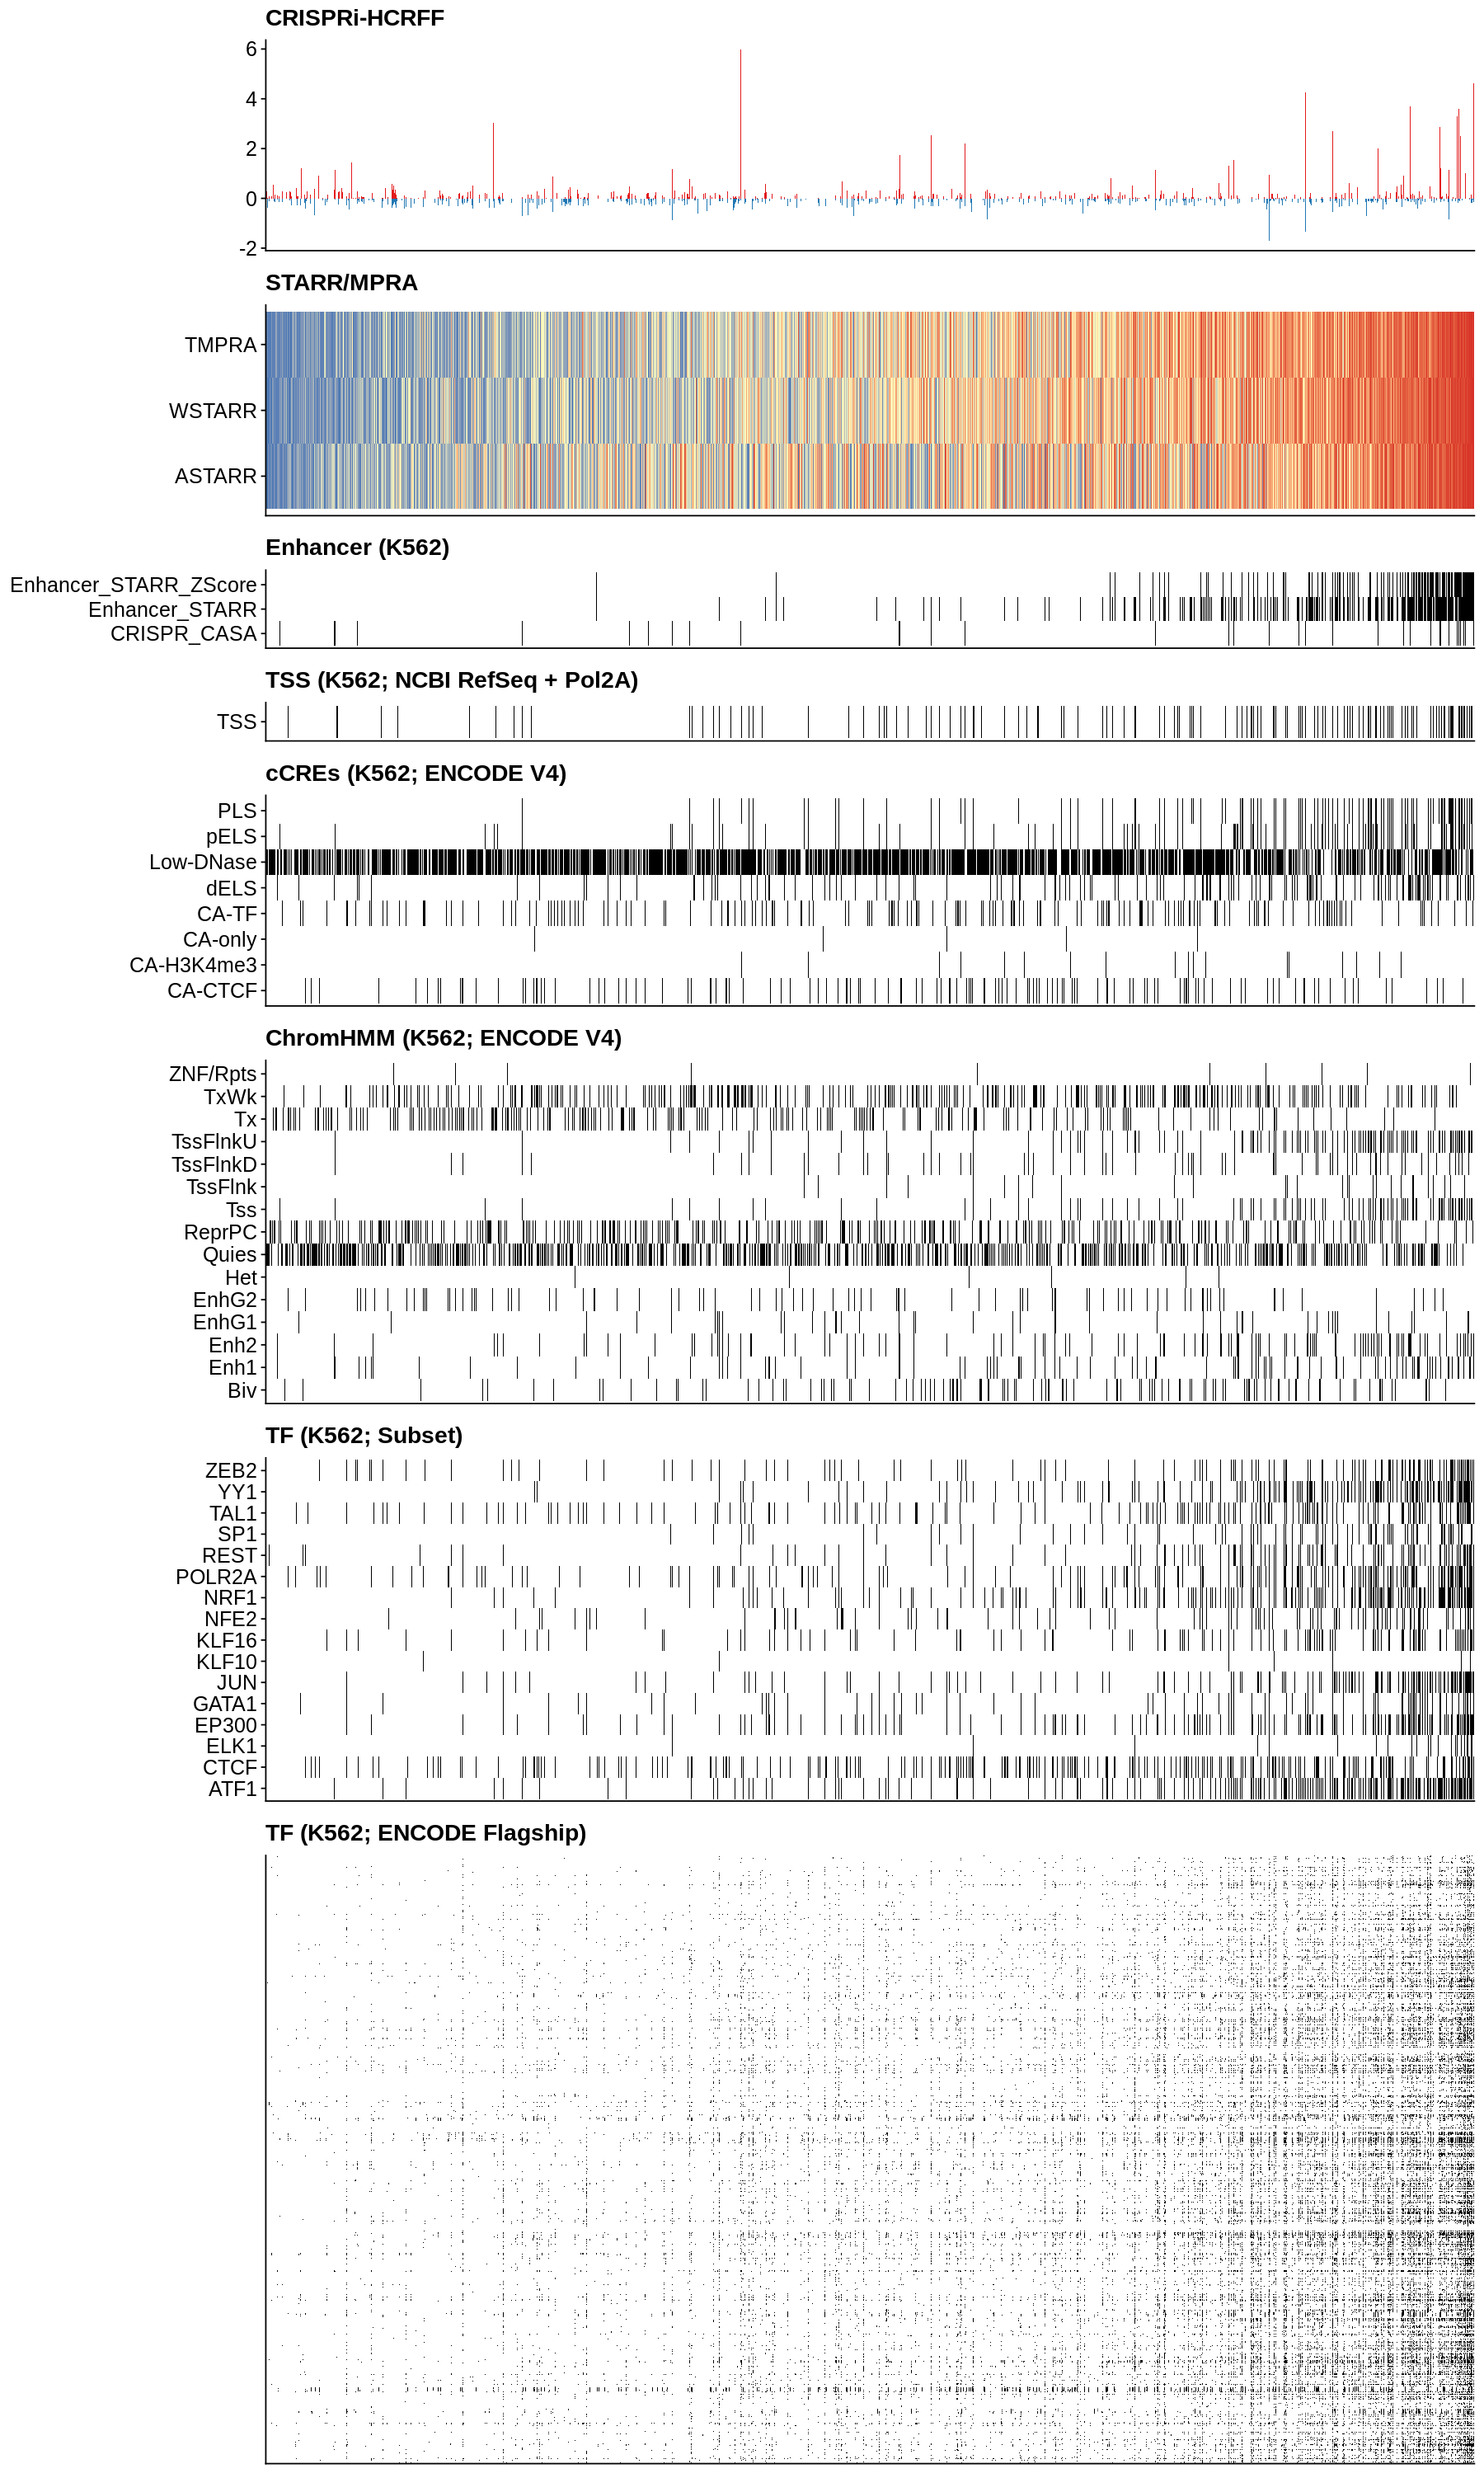

In [111]:
rel_heights_add_crispr = c(rel_heights[1], rel_heights)
lst_gpt_add_crispr = append(list(gpt_score_crispr), lst_gpt)

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt_add_crispr,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights_add_crispr)

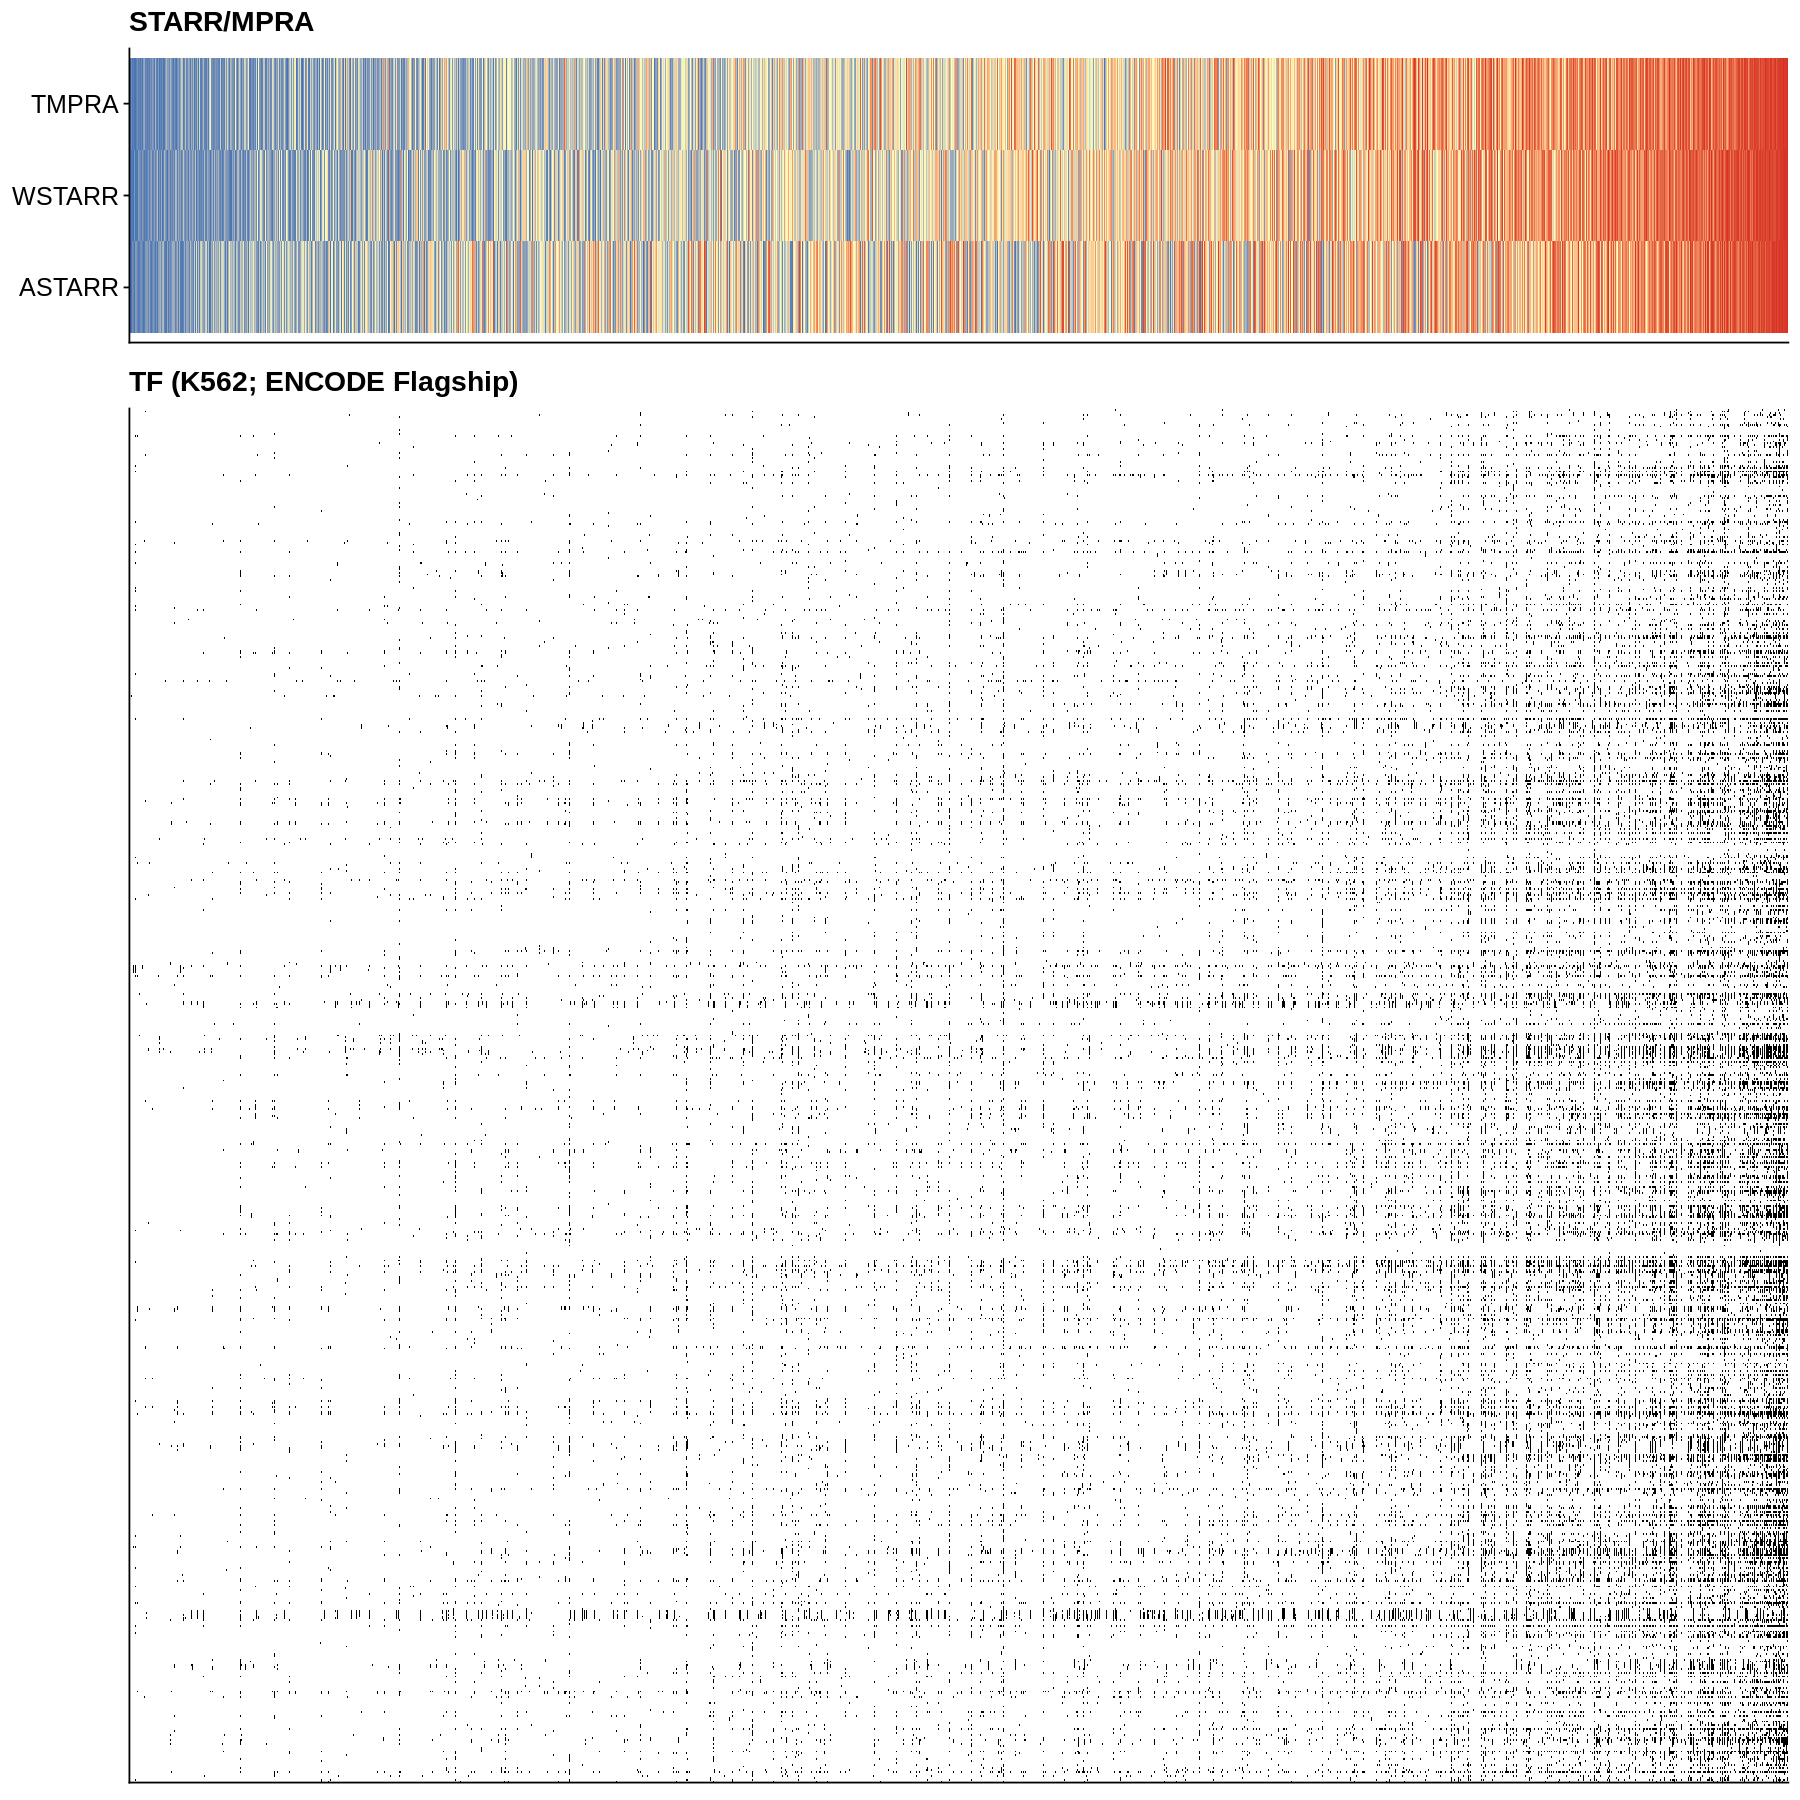

In [112]:
rel_heights = c(2, 8)
lst_gpt = list(
    gpt_score_starrmpra,
    gpt_annot_chipseq_tf
) 

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights)

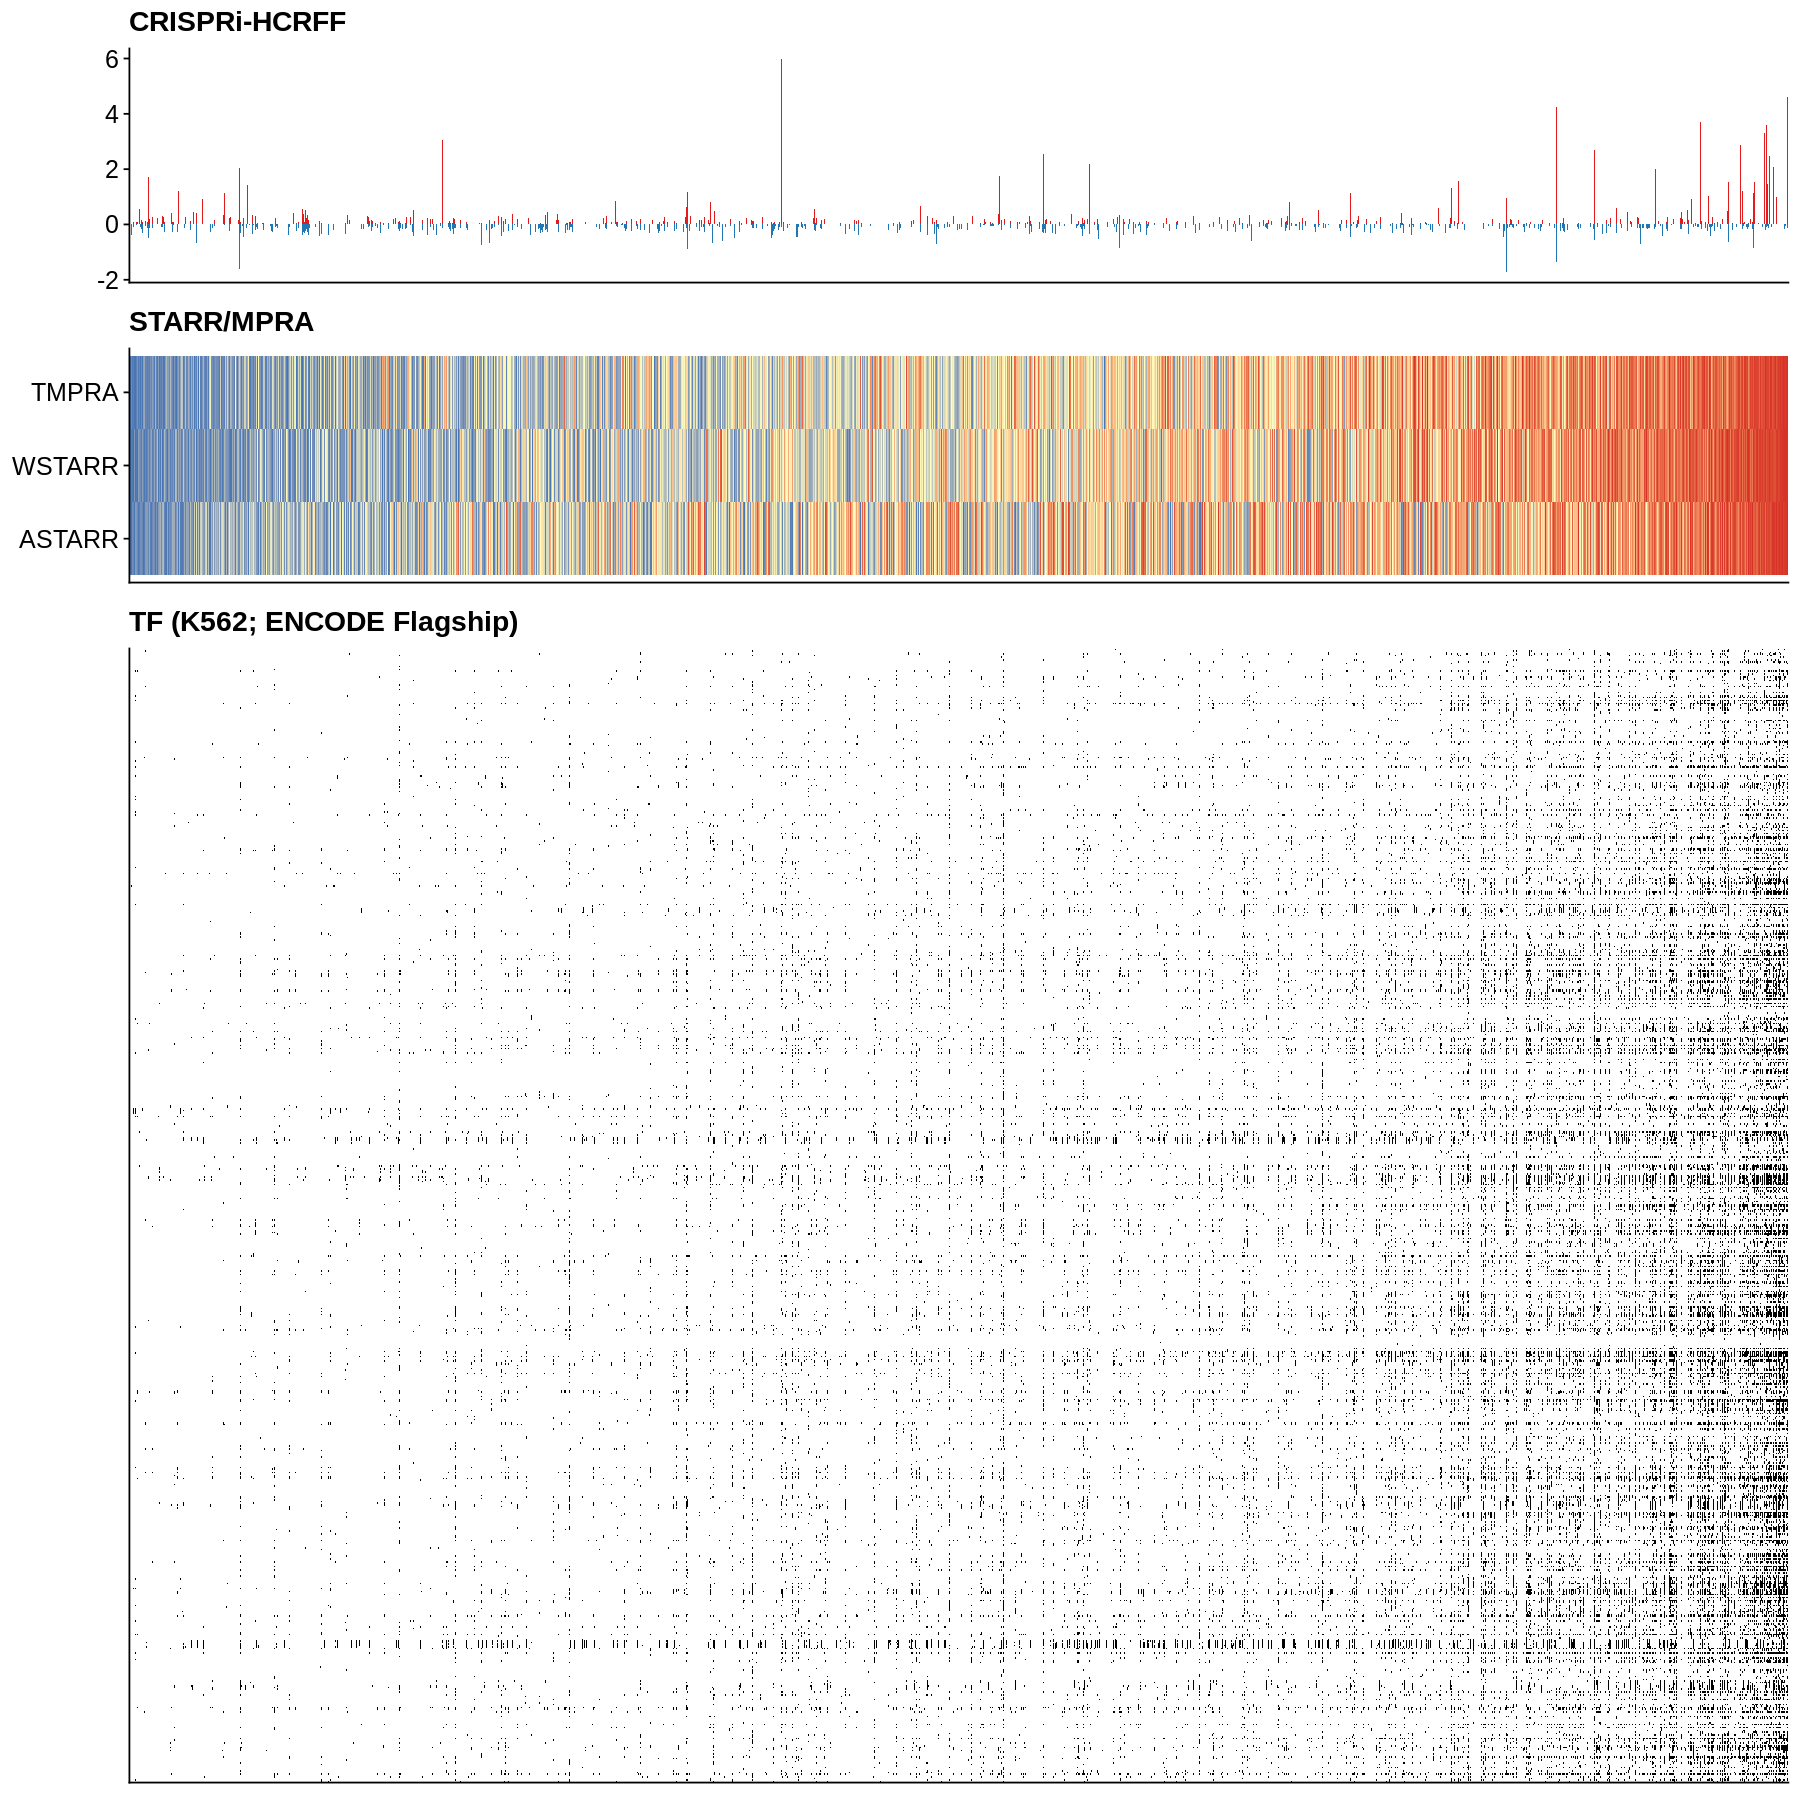

In [113]:
rel_heights_add_crispr = c(rel_heights[1], rel_heights)
lst_gpt_add_crispr = append(list(gpt_score_crispr), lst_gpt)

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt_add_crispr,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights_add_crispr)